# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [92]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


<ipython-input-92-c3f1ee80687e>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [93]:
path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\DATASOURCE\\"

train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"
train = pd.read_csv(path+train_file_name)
test = pd.read_csv(path+test_file_name)

model_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\MODELS\\"

export_data_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\FIGURES\\"


In [94]:
X_train = train.drop("VISCOSITY",axis = 1)
y_train = train.VISCOSITY
X_test = test.drop("VISCOSITY",axis = 1)
y_test = test.VISCOSITY

                              #### Load Models For testing purpose  ####

In [95]:
#All File Name variable
scaler_file = 'scaler.sav'
linear_file = 'linear_model.sav'
svr_file    = 'svr_model.sav'
dt_file     = 'dt_model.sav'
rf_file     = 'rf_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'

ann_file    = 'ann_model.h5'

In [96]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
linear_regression = pickle.load(open(model_path+linear_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
dt_regression     = pickle.load(open(model_path+dt_file , "rb"))
rf_regression     = pickle.load(open(model_path+rf_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))

ann_regression    = load_model(model_path+ann_file)

                              #### First Scale All Inputs with scaler model  ####

In [97]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [98]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [99]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

FEATURES          VIF
0       H2S    28.894730
1        N2    11.904725
2       CO2   267.575234
3        C1  4524.728757
4        C2   457.926459
5        C3  1249.429697
6        C4   411.514906
7        C5    83.588844
8        C6    92.030048
9       C7+  7395.117043
10    MWC7+     2.347915
11     Temp     1.546351
12        P     1.593451

In [100]:
linear_regression.intercept_

0.849850297979801

In [101]:
linear_regression.coef_

array([-0.34461486, -0.11129069, -0.54494544, -2.51413238, -0.5255576 ,
       -1.04667616, -1.12208352, -0.26446459, -0.4099017 , -2.76916016,
        0.15971515, -0.26020924,  0.04962063])

In [102]:
linear_weight = pd.DataFrame()
linear_weight["Feature"] = X_train.columns
linear_weight["Weights"] = linear_regression.coef_
linear_weight

Feature   Weights
0      H2S -0.344615
1       N2 -0.111291
2      CO2 -0.544945
3       C1 -2.514132
4       C2 -0.525558
5       C3 -1.046676
6       C4 -1.122084
7       C5 -0.264465
8       C6 -0.409902
9      C7+ -2.769160
10   MWC7+  0.159715
11    Temp -0.260209
12       P  0.049621

In [103]:
linear_regression_test_Prediction = linear_regression.predict(x_test)
linear_regression_train_Prediction = linear_regression.predict(x_train)

In [104]:
linear_regression_trainR2 = linear_regression.score(x_train,y_train)
linear_regression_testR2 = linear_regression.score(x_test,y_test)
print(linear_regression_trainR2,linear_regression_testR2)

0.6149421060565164 0.643496618426523


                     #### Model Result for train and test data for linear Regression ####

In [108]:
result_lr_train = pd.DataFrame()
result_lr_train["Viscosity (train)"] = y_train
result_lr_train["Predicted Viscosity (train)"] = linear_regression_train_Prediction
result_lr_train["Residues"] = abs(result_lr_train["Viscosity (train)"] - result_lr_train["Predicted Viscosity (train)"])
result_lr_train["Absolute Error (%)"] = result_lr_train["Residues"]*100/result_lr_train["Viscosity (train)"]

result_lr_test = pd.DataFrame()
result_lr_test["Viscosity (test)"] = y_test
result_lr_test["Predicted Viscosity (test)"] = linear_regression_test_Prediction
result_lr_test["Residues"] = abs(result_lr_test["Viscosity (test)"] - result_lr_test["Predicted Viscosity (test)"])
result_lr_test["Absolute Error (%)"] = result_lr_test["Residues"]*100/result_lr_test["Viscosity (test)"]




In [109]:
result_lr_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.849850    0.268575   
std             0.634664                     0.497692    0.287406   
min             0.027323                    -0.167258    0.000566   
25%             0.353803                     0.415248    0.075953   
50%             0.666888                     0.850002    0.181029   
75%             1.171250                     1.155240    0.374783   
max             3.390000                     2.155313    1.934636   

       Absolute Error (%)  
count          198.000000  
mean            55.372831  
std            112.292273  
min              0.201210  
25%             11.681493  
50%             25.264143  
75%             54.261720  
max            812.043846

In [110]:
result_lr_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.787600   0.261063   
std            0.658213                    0.503228   0.292383   
min            0.011569                   -0.196787   0.000023   
25%            0.321901                    0.405193   0.083292   
50%            0.499180                    0.617755   0.163882   
75%            1.120000                    1.139782   0.284141   
max            3.010000                    2.133927   1.609564   

       Absolute Error (%)  
count           85.000000  
mean            80.183489  
std            239.589145  
min              0.009772  
25%             14.666472  
50%             28.999074  
75%             52.509640  
max           1800.989371

<ipython-input-124-6270b5d295e8>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-124-6270b5d295e8>:38: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


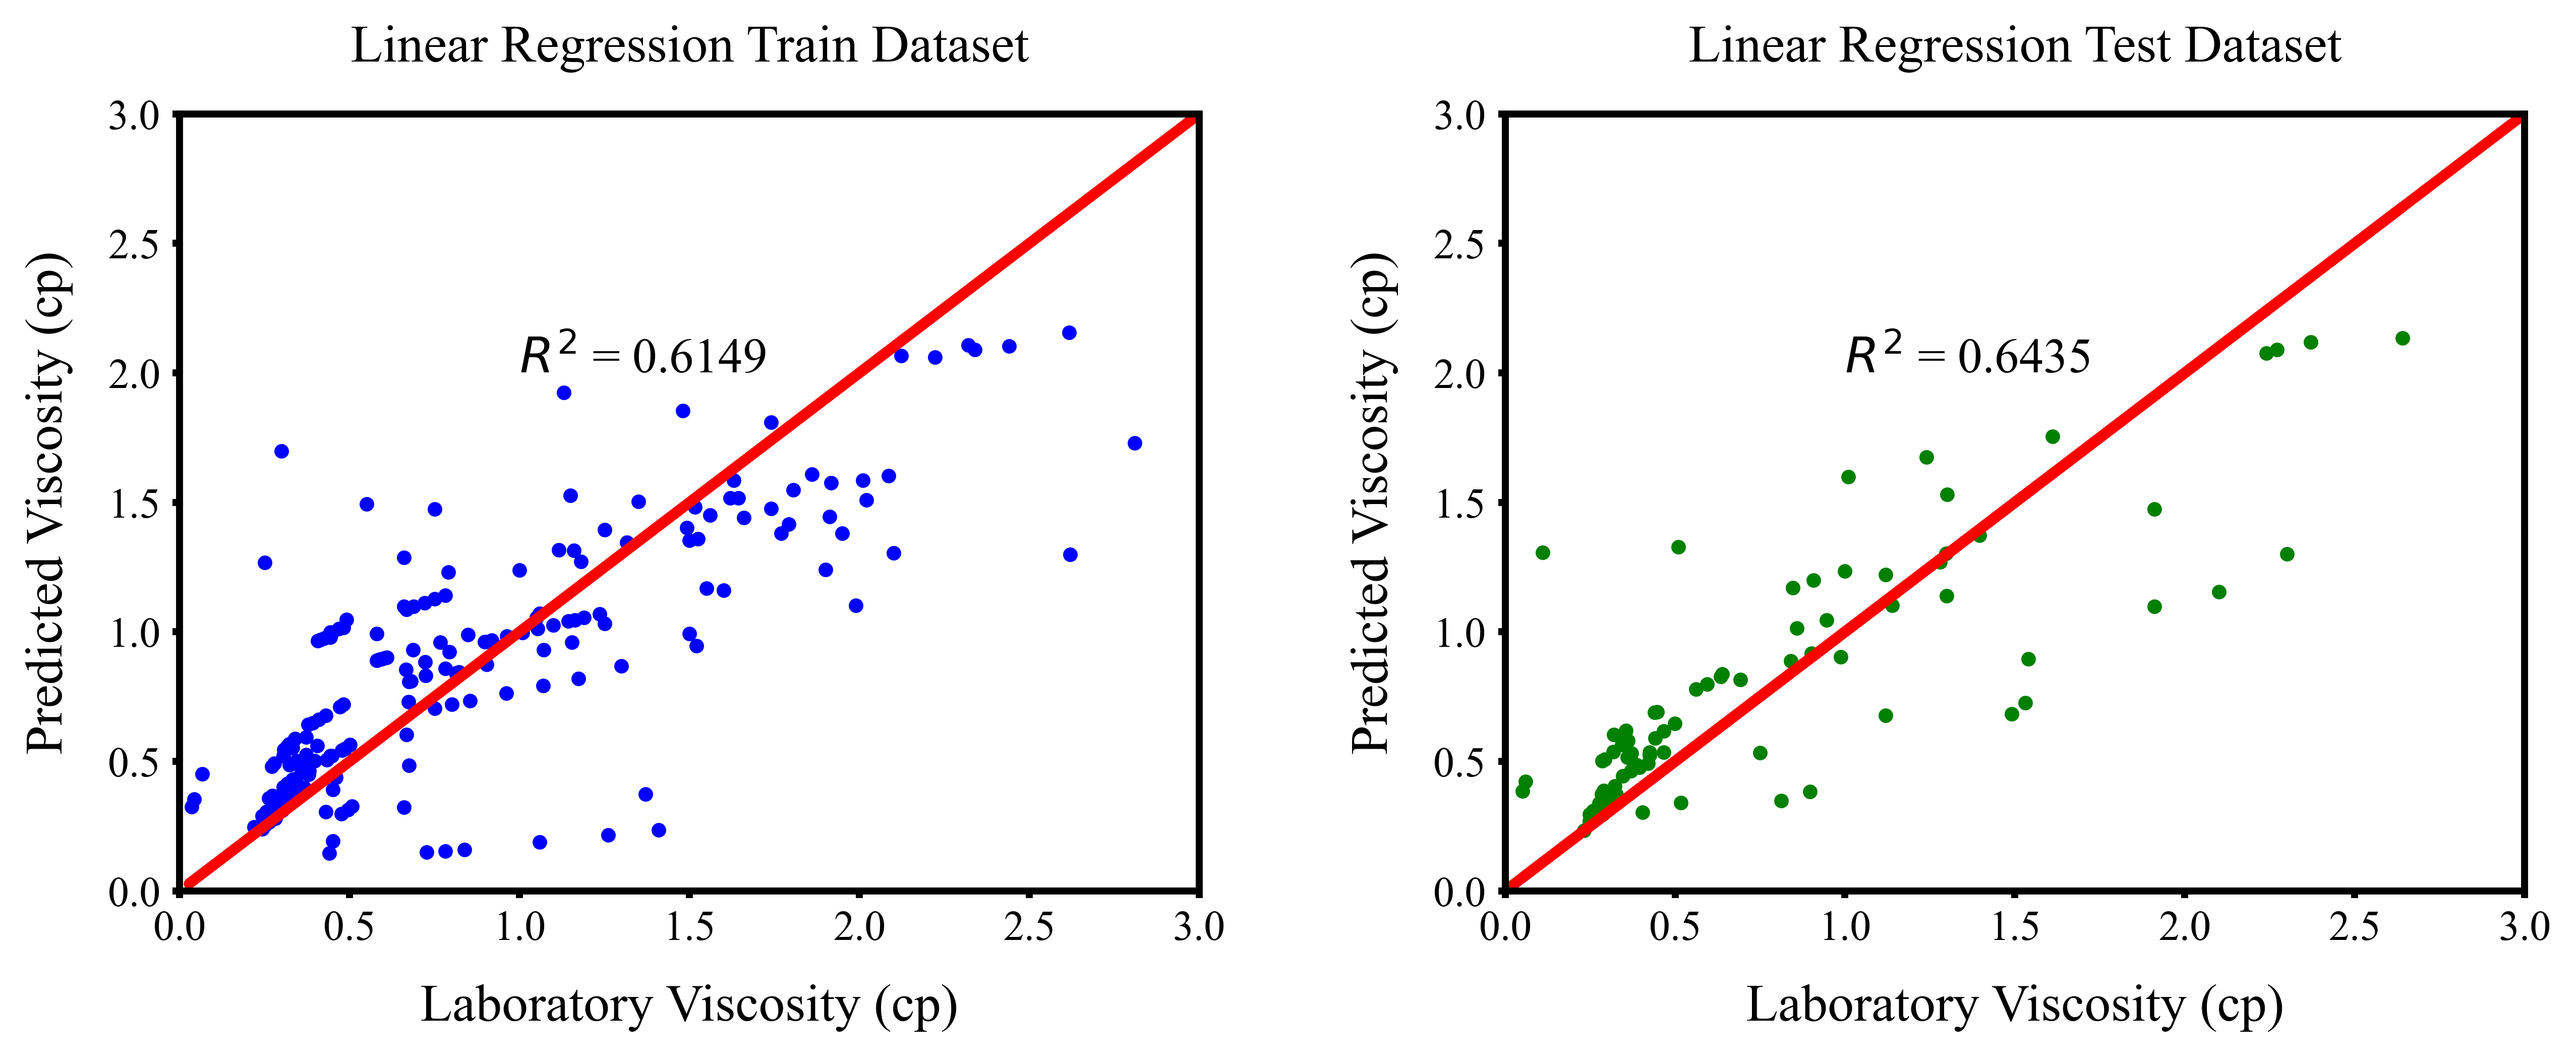

In [124]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["font.family"] = "Times New Roman"
fig1 = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , linear_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(linear_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Linear Regression Train Dataset" , pad = 15 , fontsize = 15)
plt.text(1,2, "$R^2$ = {:.4f}".format(linear_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))
ax2 = plt.subplot(122)
plt.scatter(y_test , linear_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(linear_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Linear Regression Test Dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(linear_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig1.savefig(figure_path + "Linear Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [125]:
lr_MSE_train = mean_squared_error(y_train,linear_regression_train_Prediction)
lr_MAE_train = mean_absolute_error(y_train,linear_regression_train_Prediction)
lr_MSE_test  = mean_squared_error(y_test,linear_regression_test_Prediction)
lr_MAE_test  = mean_absolute_error(y_test,linear_regression_test_Prediction)

In [126]:
print(lr_MSE_train , lr_MAE_train , lr_MSE_test ,lr_MAE_test )

0.15431738080010146 0.26857464499671274 0.15263612008553384 0.26106280331395343


## 2. SVR MODEL

In [127]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [128]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.965429600333126 0.645871122751448


In [130]:
result_svr_train = pd.DataFrame()
result_svr_train["Viscosity (train)"] = y_train
result_svr_train["Predicted Viscosity (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Viscosity (train)"] - result_svr_train["Predicted Viscosity (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Viscosity (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Viscosity (test)"] = y_test
result_svr_test["Predicted Viscosity (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Viscosity (test)"] - result_svr_test["Predicted Viscosity (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Viscosity (test)"]




In [131]:
result_svr_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.873937    0.081658   
std             0.634664                     0.619364    0.084988   
min             0.027323                     0.072361    0.009323   
25%             0.353803                     0.391819    0.047788   
50%             0.666888                     0.629199    0.084580   
75%             1.171250                     1.208329    0.099972   
max             3.390000                     3.290008    0.910897   

       Absolute Error (%)  
count          198.000000  
mean            18.595443  
std             36.910544  
min              0.880651  
25%              5.931887  
50%             10.956923  
75%             20.086273  
max            367.950783

In [132]:
result_svr_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.846267   0.211468   
std            0.658213                    0.638671   0.328898   
min            0.011569                    0.050624   0.000159   
25%            0.321901                    0.344384   0.033797   
50%            0.499180                    0.615720   0.066864   
75%            1.120000                    1.167220   0.216395   
max            3.010000                    2.459202   1.715110   

       Absolute Error (%)  
count           85.000000  
mean            60.103801  
std            211.244119  
min              0.034156  
25%              5.906320  
50%             13.628972  
75%             32.694815  
max           1520.917683

<ipython-input-133-9edd62df9ac5>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-133-9edd62df9ac5>:38: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


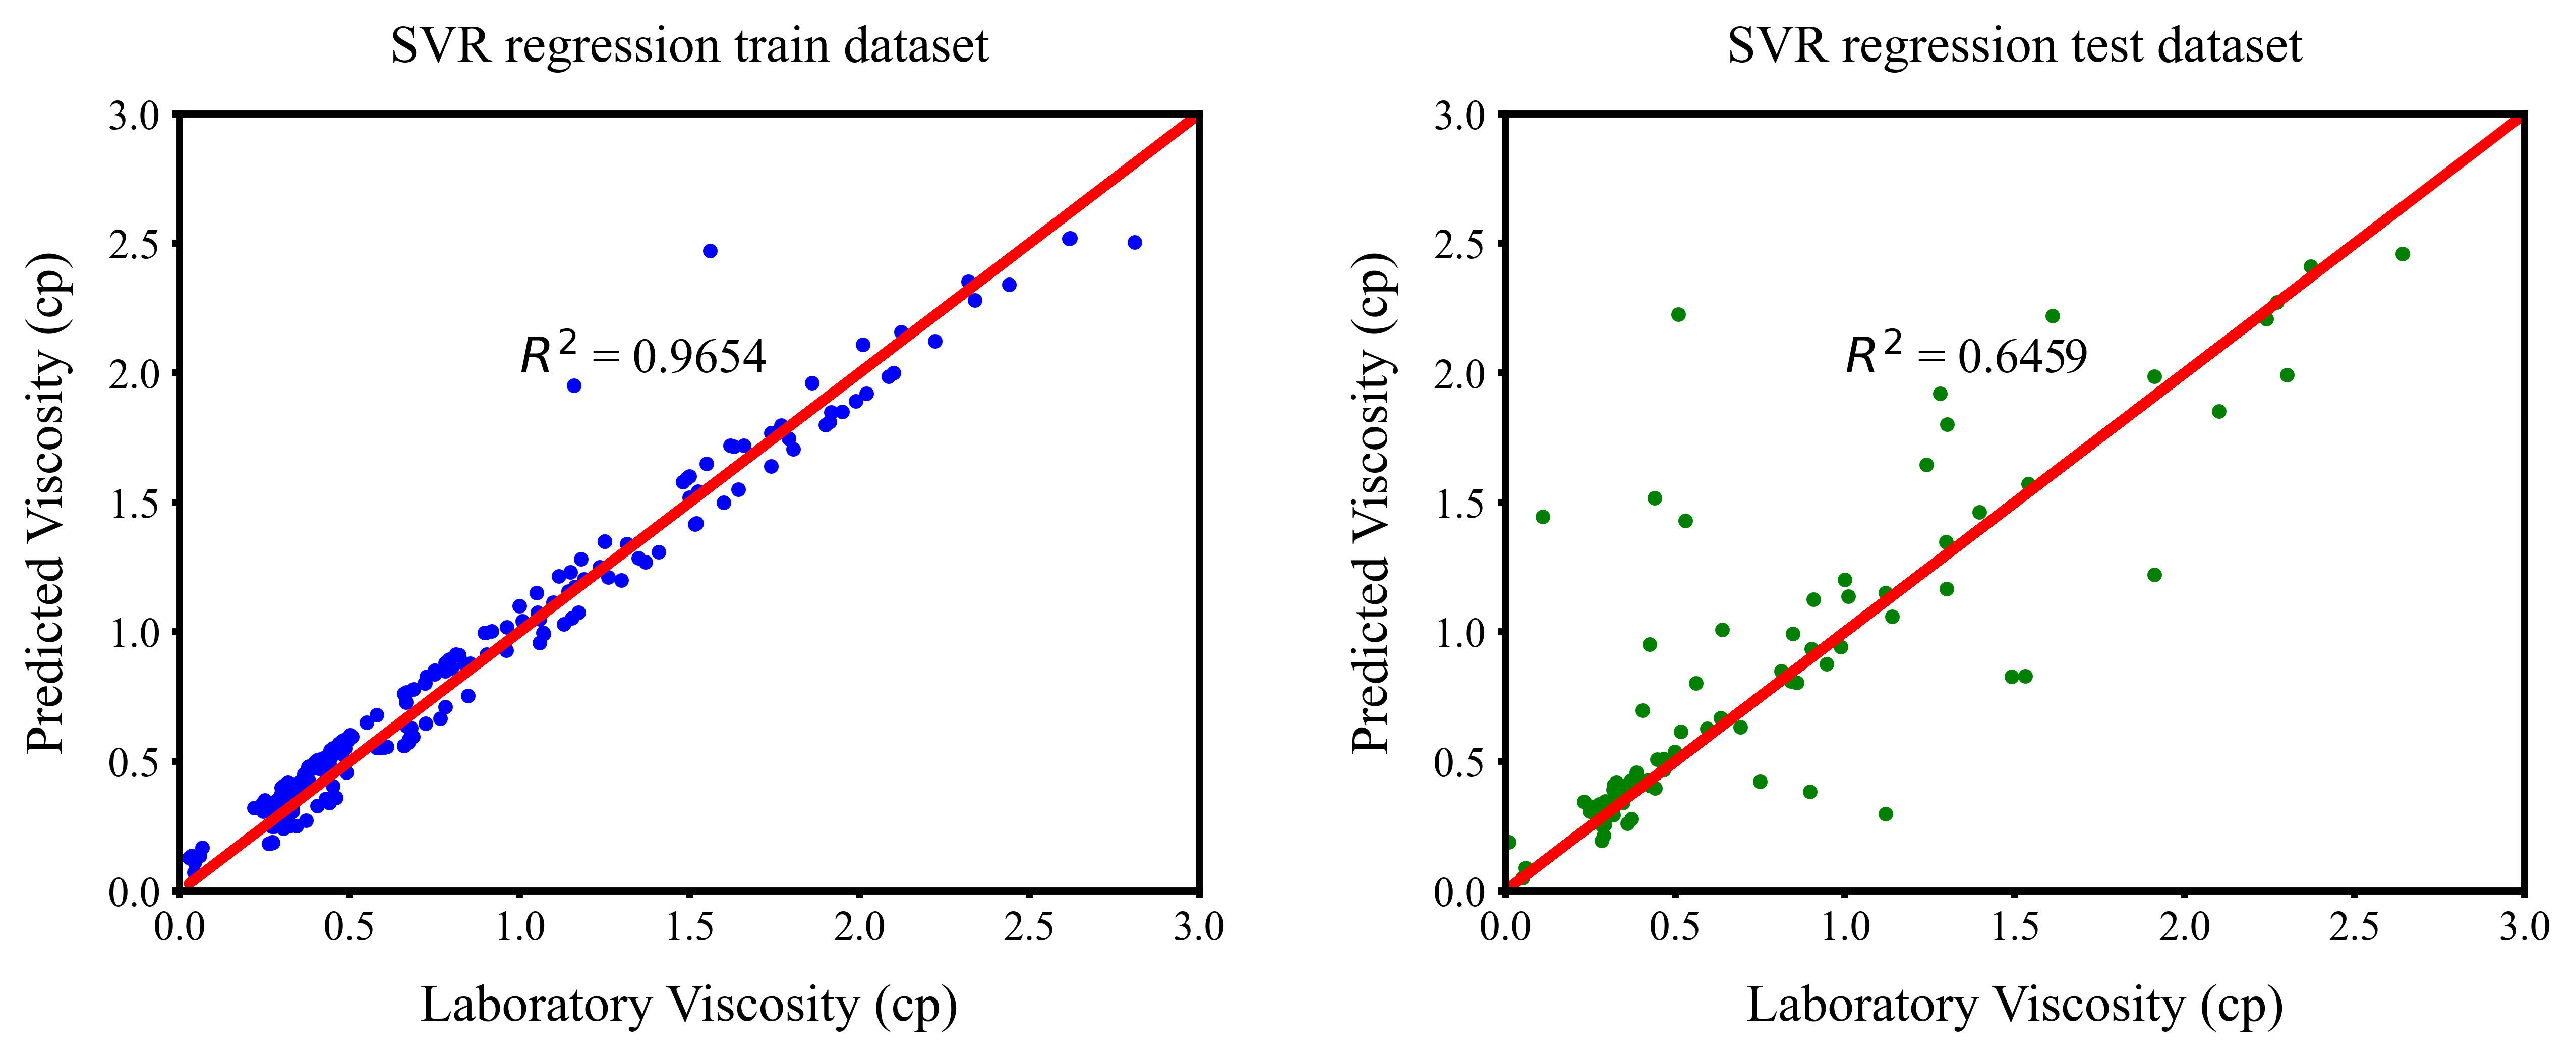

In [133]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text(1,2 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text(1,2, "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [134]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

0.013854575152763133 0.08165808303723626 0.15161948140546522 0.21146750249466642


In [135]:
## 3. Decision Tree Model 

In [136]:
dt_regression_test_Prediction = dt_regression.predict(x_test)
dt_regression_train_Prediction = dt_regression.predict(x_train)


In [137]:
dt_regression_trainR2 = dt_regression.score(x_train,y_train)
dt_regression_testR2 = dt_regression.score(x_test,y_test)
print(dt_regression_trainR2 , dt_regression_testR2)

0.8624257152629771 0.6400834426538256


In [138]:
result_dt_train = pd.DataFrame()
result_dt_train["Viscosity (train)"] = y_train
result_dt_train["Predicted Viscosity (train)"] = dt_regression_train_Prediction
result_dt_train["Residues"] = abs(result_dt_train["Viscosity (train)"] - result_dt_train["Predicted Viscosity (train)"])
result_dt_train["Absolute Error (%)"] = result_dt_train["Residues"]*100/result_dt_train["Viscosity (train)"]

result_dt_test = pd.DataFrame()
result_dt_test["Viscosity (test)"] = y_test
result_dt_test["Predicted Viscosity (test)"] = dt_regression_test_Prediction
result_dt_test["Residues"] = abs(result_dt_test["Viscosity (test)"] - result_dt_test["Predicted Viscosity (test)"])
result_dt_test["Absolute Error (%)"] = result_dt_test["Residues"]*100/result_dt_test["Viscosity (test)"]




In [139]:
result_dt_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.842228    0.103590   
std             0.634664                     0.585387    0.211257   
min             0.027323                     0.035200    0.000000   
25%             0.353803                     0.306000    0.008017   
50%             0.666888                     0.674000    0.036193   
75%             1.171250                     1.250000    0.078436   
max             3.390000                     2.620000    1.830000   

       Absolute Error (%)  
count          198.000000  
mean            12.284230  
std             18.657147  
min              0.000000  
25%              1.633741  
50%              5.660688  
75%             16.046774  
max            136.363636

In [140]:
result_dt_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.816590   0.222756   
std            0.658213                    0.650900   0.325148   
min            0.011569                    0.035692   0.000370   
25%            0.321901                    0.306000   0.026892   
50%            0.499180                    0.440040   0.073480   
75%            1.120000                    1.335196   0.311721   
max            3.010000                    2.617284   1.675472   

       Absolute Error (%)  
count           85.000000  
mean            33.810004  
std             59.237058  
min              0.721680  
25%              6.472557  
50%             17.770893  
75%             30.795882  
max            394.667018

<ipython-input-141-340fcbc1769a>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-141-340fcbc1769a>:39: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


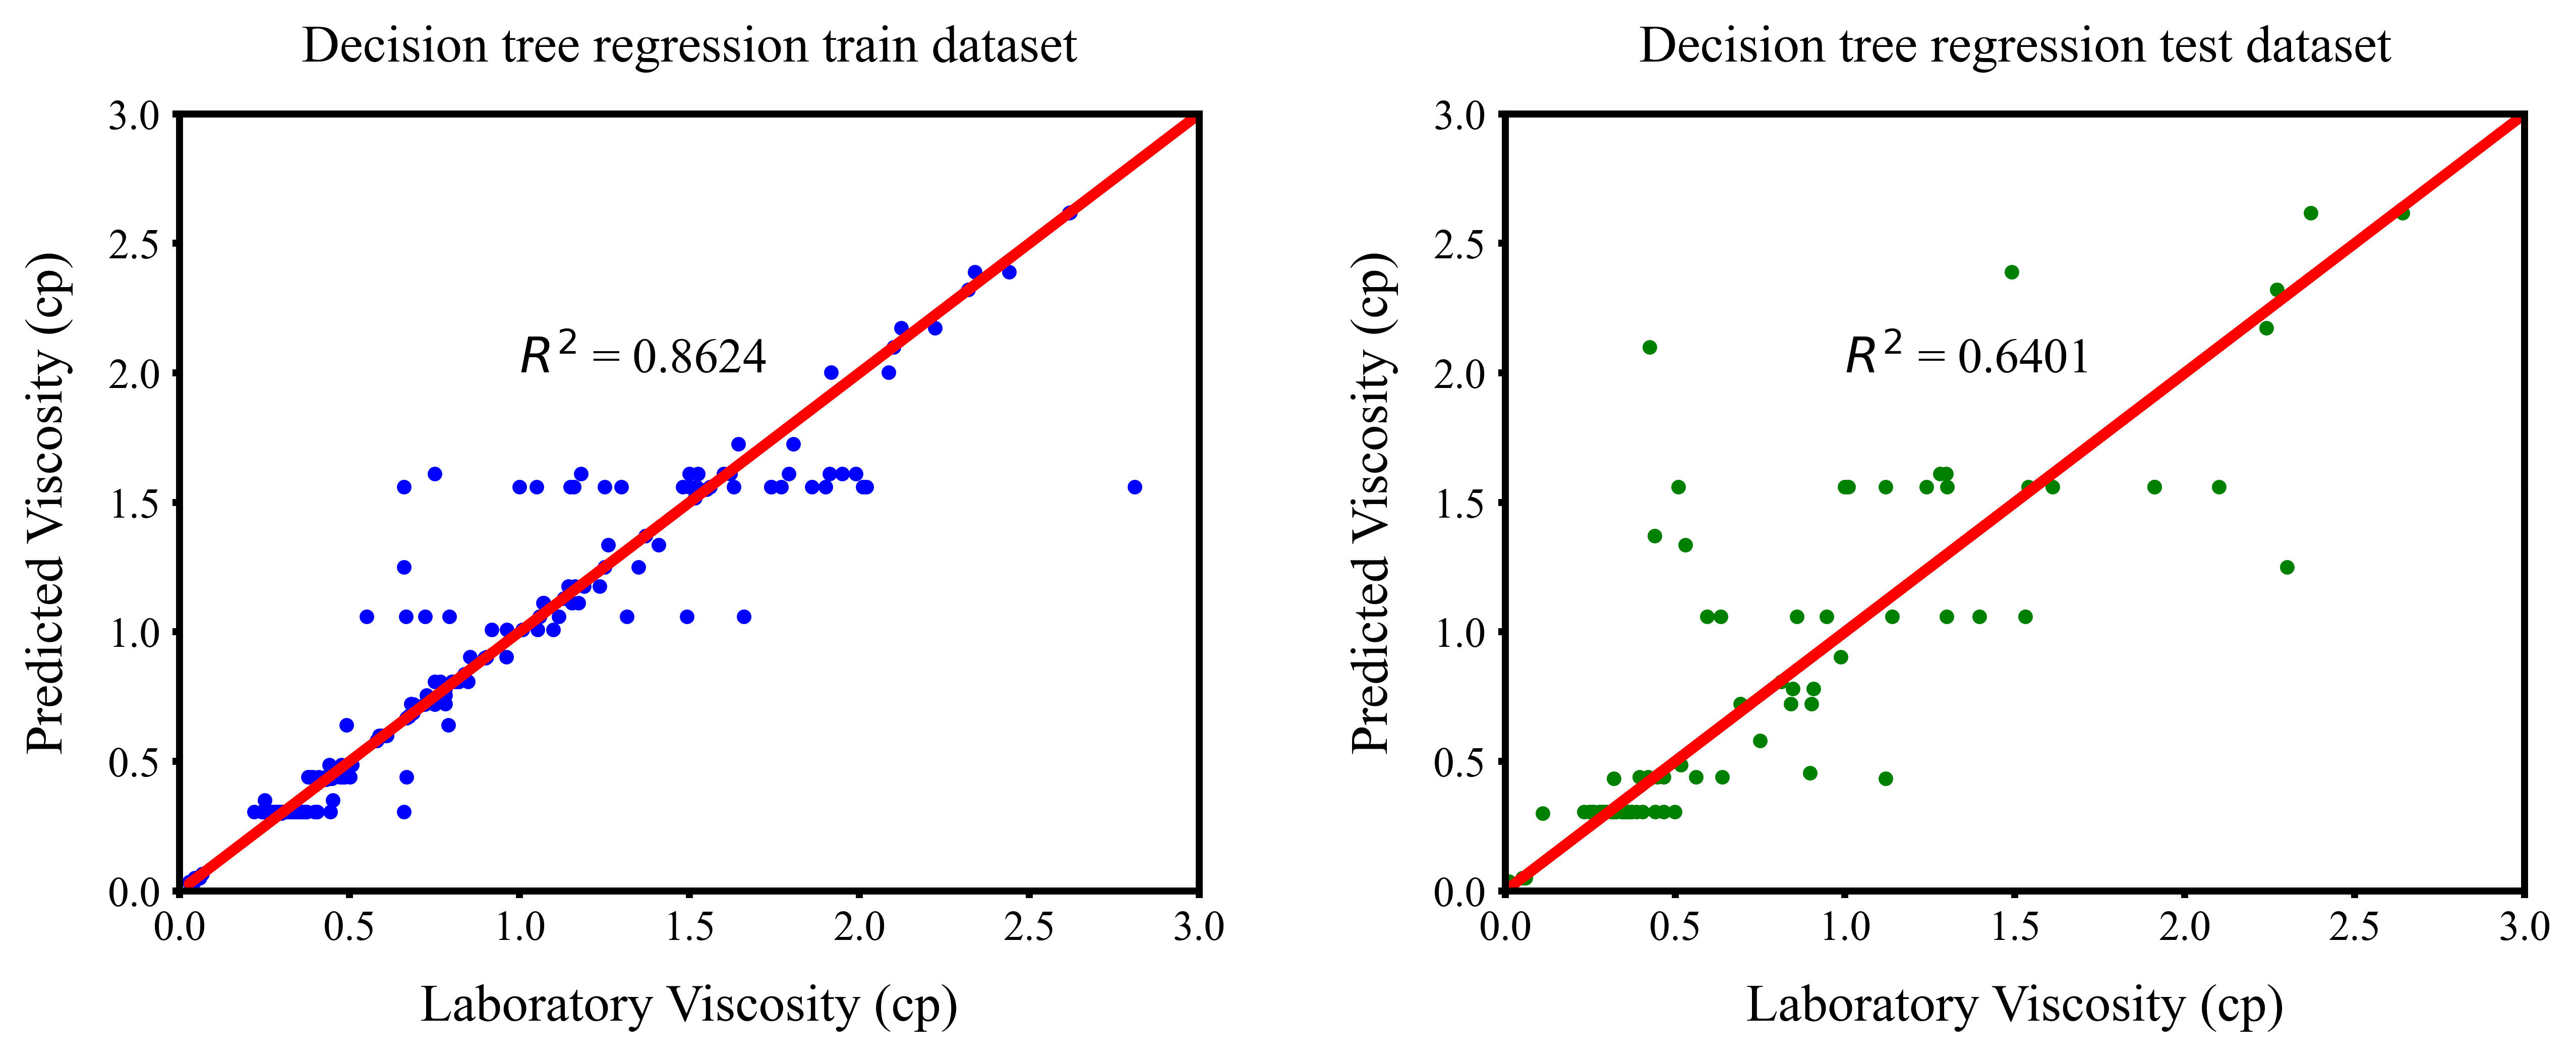

In [141]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_dt = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , dt_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2, "$R^2$ = {:.4f}".format(dt_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

ax2 = plt.subplot(122)
plt.scatter(y_test , dt_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2, "$R^2$ = {:.4f}".format(dt_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [142]:
dt_MSE_train = mean_squared_error(y_train,dt_regression_train_Prediction)
dt_MAE_train = mean_absolute_error(y_train,dt_regression_train_Prediction)
dt_MSE_test  = mean_squared_error(y_test,dt_regression_test_Prediction)
dt_MAE_test  = mean_absolute_error(y_test,dt_regression_test_Prediction)
print(dt_MSE_train , dt_MAE_train , dt_MSE_test ,  dt_MAE_test )

0.05513483457939647 0.10358968686868684 0.15409746360719997 0.2227557411764706


## 4. Random forest Model 

In [143]:
rf_regression_test_Prediction = rf_regression.predict(x_test)
rf_regression_train_Prediction = rf_regression.predict(x_train)


In [144]:
rf_regression_trainR2 = rf_regression.score(x_train,y_train)
rf_regression_testR2 = rf_regression.score(x_test,y_test)
print(rf_regression_trainR2 , rf_regression_testR2)

0.9599484330607917 0.7652850981100843


In [145]:
result_rf_train = pd.DataFrame()
result_rf_train["Viscosity (train)"] = y_train
result_rf_train["Predicted Viscosity (train)"] = rf_regression_train_Prediction
result_rf_train["Residues"] = abs(result_rf_train["Viscosity (train)"] - result_rf_train["Predicted Viscosity (train)"])
result_rf_train["Absolute Error (%)"] = result_rf_train["Residues"]*100/result_rf_train["Viscosity (train)"]

result_rf_test = pd.DataFrame()
result_rf_test["Viscosity (test)"] = y_test
result_rf_test["Predicted Viscosity (test)"] = rf_regression_test_Prediction
result_rf_test["Residues"] = abs(result_rf_test["Viscosity (test)"] - result_rf_test["Predicted Viscosity (test)"])
result_rf_test["Absolute Error (%)"] = result_rf_test["Residues"]*100/result_rf_test["Viscosity (test)"]




In [146]:
result_rf_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.845185    0.053745   
std             0.634664                     0.580627    0.115020   
min             0.027323                     0.049978    0.000095   
25%             0.353803                     0.358113    0.003689   
50%             0.666888                     0.697853    0.010504   
75%             1.171250                     1.226078    0.043719   
max             3.390000                     2.486059    0.924649   

       Absolute Error (%)  
count          198.000000  
mean             7.893801  
std             21.331410  
min              0.036088  
25%              0.697063  
50%              1.878583  
75%              4.973764  
max            201.696041

In [147]:
result_rf_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.789542   0.169303   
std            0.658213                    0.583519   0.269600   
min            0.011569                    0.068473   0.000217   
25%            0.321901                    0.334298   0.010108   
50%            0.499180                    0.492982   0.054657   
75%            1.120000                    1.261349   0.242253   
max            3.010000                    2.473956   1.476847   

       Absolute Error (%)  
count           85.000000  
mean            40.288840  
std            149.827837  
min              0.067511  
25%              2.312882  
50%              7.407630  
75%             25.593960  
max           1138.868040

<ipython-input-148-202177a1c2c8>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-148-202177a1c2c8>:40: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


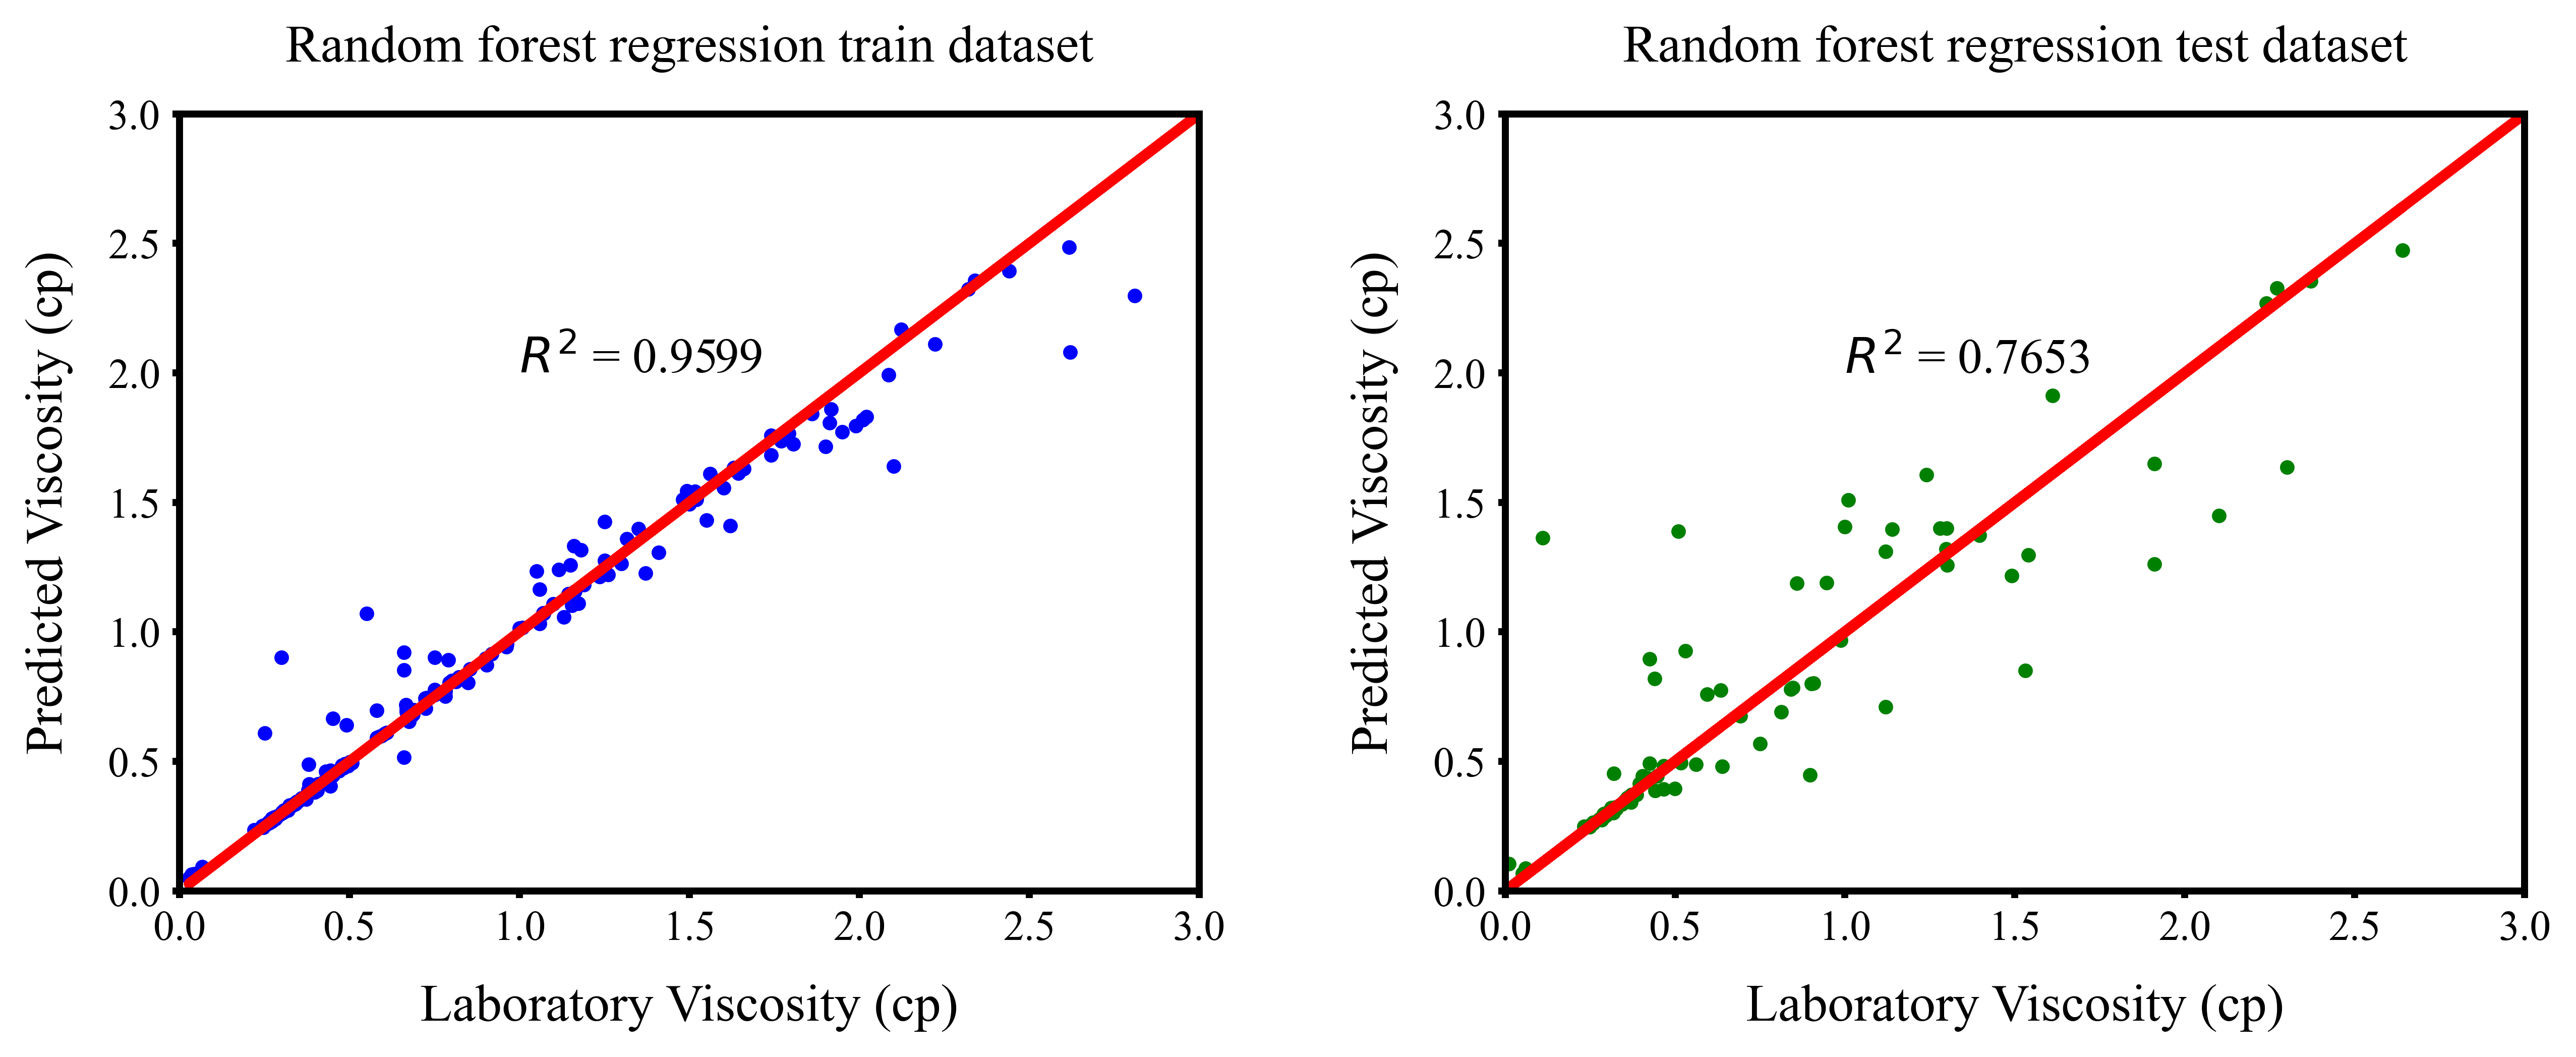

In [148]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_rf = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , rf_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(rf_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , rf_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(rf_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [149]:
rf_MSE_train = mean_squared_error(y_train,rf_regression_train_Prediction)
rf_MAE_train = mean_absolute_error(y_train,rf_regression_train_Prediction)
rf_MSE_test  = mean_squared_error(y_test,rf_regression_test_Prediction)
rf_MAE_test  = mean_absolute_error(y_test,rf_regression_test_Prediction)
print(rf_MSE_train , rf_MAE_train , rf_MSE_test , rf_MAE_test )

0.016051230228526947 0.05374466163010355 0.10049265673893631 0.16930293396102786


## 5. KNN Model

In [150]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [151]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.8596611276302843 0.7195059722785486


In [154]:
result_knn_train = pd.DataFrame()
result_knn_train["Viscosity (train)"] = y_train
result_knn_train["Predicted Viscosity (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Viscosity (train)"] - result_knn_train["Predicted Viscosity (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Viscosity (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Viscosity (test)"] = y_test
result_knn_test["Predicted Viscosity (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Viscosity (test)"] - result_knn_test["Predicted Viscosity (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Viscosity (test)"]




In [155]:
result_knn_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.857560    0.112810   
std             0.634664                     0.595206    0.209135   
min             0.027323                     0.035364    0.000000   
25%             0.353803                     0.354472    0.005337   
50%             0.666888                     0.693000    0.016616   
75%             1.171250                     1.342050    0.138333   
max             3.390000                     2.459424    1.249227   

       Absolute Error (%)  
count          198.000000  
mean            12.729506  
std             33.881775  
min              0.000000  
25%              0.910599  
50%              3.656522  
75%             12.470233  
max            417.801561

In [156]:
result_knn_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.795991   0.178417   
std            0.658213                    0.616018   0.298850   
min            0.011569                    0.042995   0.000428   
25%            0.321901                    0.326000   0.011394   
50%            0.499180                    0.484812   0.055667   
75%            1.120000                    1.053333   0.181818   
max            3.010000                    2.459424   1.440000   

       Absolute Error (%)  
count           85.000000  
mean            37.227161  
std            146.235287  
min              0.142341  
25%              3.061735  
50%              8.398027  
75%             21.989529  
max           1309.090909

<ipython-input-159-4d6f0675633c>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-159-4d6f0675633c>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


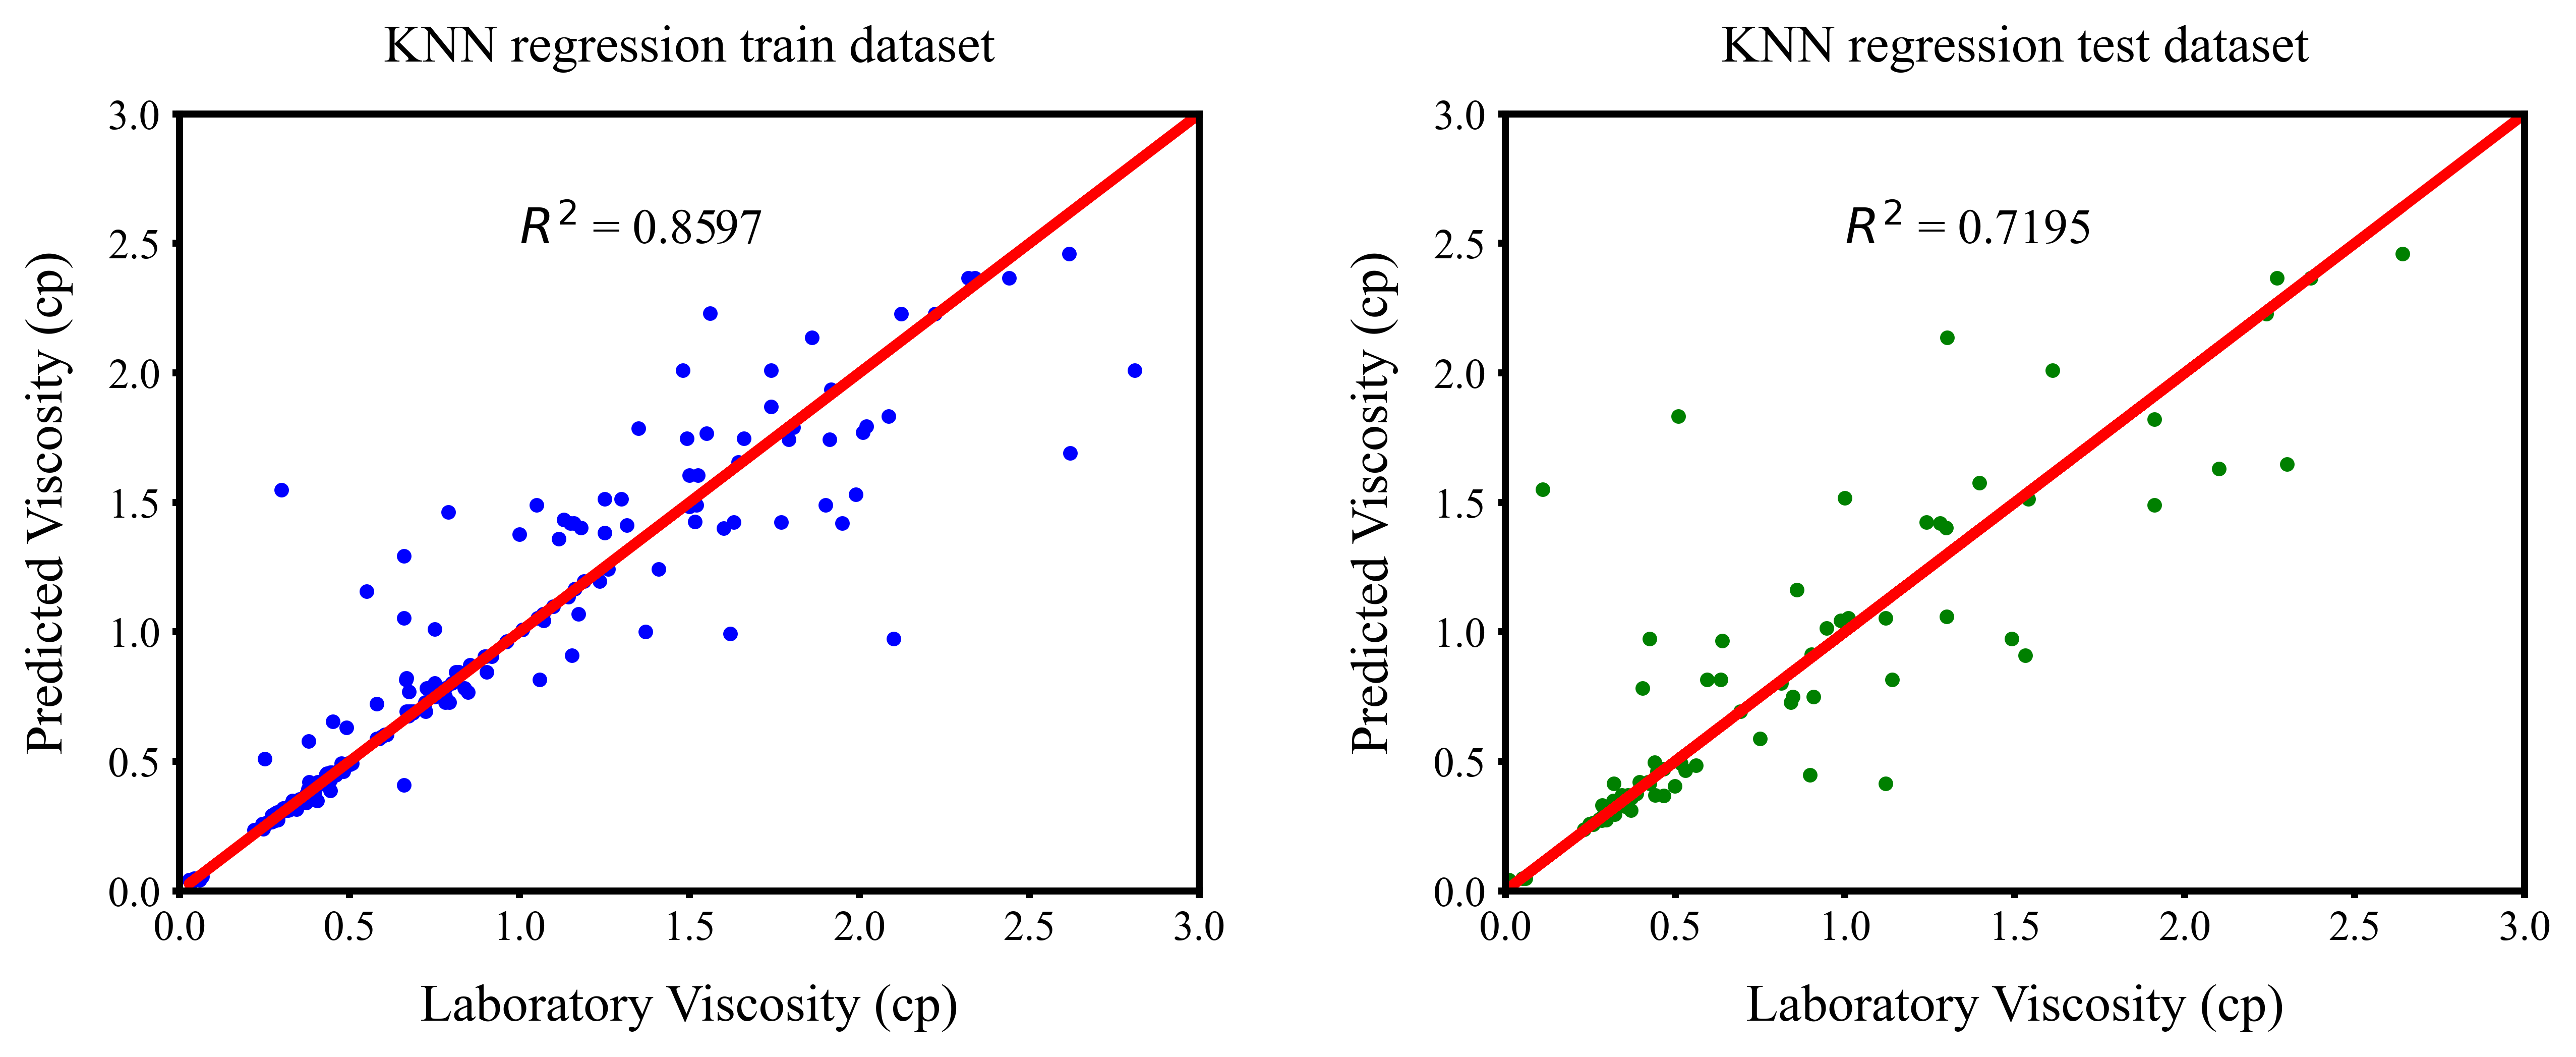

In [159]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text(1,2.5 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2.5 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [160]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

0.05624278205737262 0.11280968013468014 0.1200928863833019 0.17841687058823524


## 6. ANN Model

In [161]:
ann_regression_test_Prediction = ann_regression.predict(x_test)
ann_regression_train_Prediction = ann_regression.predict(x_train)


In [162]:
from sklearn.metrics import r2_score
ann_regression_trainR2 = r2_score(y_train , ann_regression_train_Prediction)
ann_regression_testR2 = r2_score(y_test , ann_regression_test_Prediction)
print(ann_regression_trainR2 , ann_regression_testR2)

0.9446714758870812 0.76302252718319


In [163]:
result_ann_train = pd.DataFrame()
result_ann_train["Viscosity (train)"] = y_train
result_ann_train["Predicted Viscosity (train)"] = ann_regression_train_Prediction
result_ann_train["Residues"] = abs(result_ann_train["Viscosity (train)"] - result_ann_train["Predicted Viscosity (train)"])
result_ann_train["Absolute Error (%)"] = result_ann_train["Residues"]*100/result_ann_train["Viscosity (train)"]

result_ann_test = pd.DataFrame()
result_ann_test["Viscosity (test)"] = y_test
result_ann_test["Predicted Viscosity (test)"] = ann_regression_test_Prediction
result_ann_test["Residues"] = abs(result_ann_test["Viscosity (test)"] - result_ann_test["Predicted Viscosity (test)"])
result_ann_test["Absolute Error (%)"] = result_ann_test["Residues"]*100/result_ann_test["Viscosity (test)"]




In [164]:
result_ann_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.811944    0.068617   
std             0.634664                     0.605778    0.132492   
min             0.027323                     0.027522    0.000199   
25%             0.353803                     0.333861    0.014561   
50%             0.666888                     0.643637    0.033163   
75%             1.171250                     1.151356    0.058916   
max             3.390000                     2.845383    1.212992   

       Absolute Error (%)  
count          198.000000  
mean             9.288394  
std             14.745690  
min              0.078821  
25%              2.652345  
50%              5.433094  
75%              9.301901  
max            118.367624

In [165]:
result_ann_test.describe()

Viscosity (test)  Predicted Viscosity (test)   Residues  \
count         85.000000                   85.000000  85.000000   
mean           0.792203                    0.783590   0.162932   
std            0.658213                    0.599698   0.275329   
min            0.011569                   -0.019918   0.000505   
25%            0.321901                    0.314001   0.024602   
50%            0.499180                    0.634230   0.042555   
75%            1.120000                    1.066762   0.143367   
max            3.010000                    2.496633   1.648179   

       Absolute Error (%)  
count           85.000000  
mean            31.328034  
std             60.672744  
min              0.217083  
25%              4.073388  
50%              8.638423  
75%             23.328466  
max            359.258719

<ipython-input-167-dca4d38d3f71>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-167-dca4d38d3f71>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


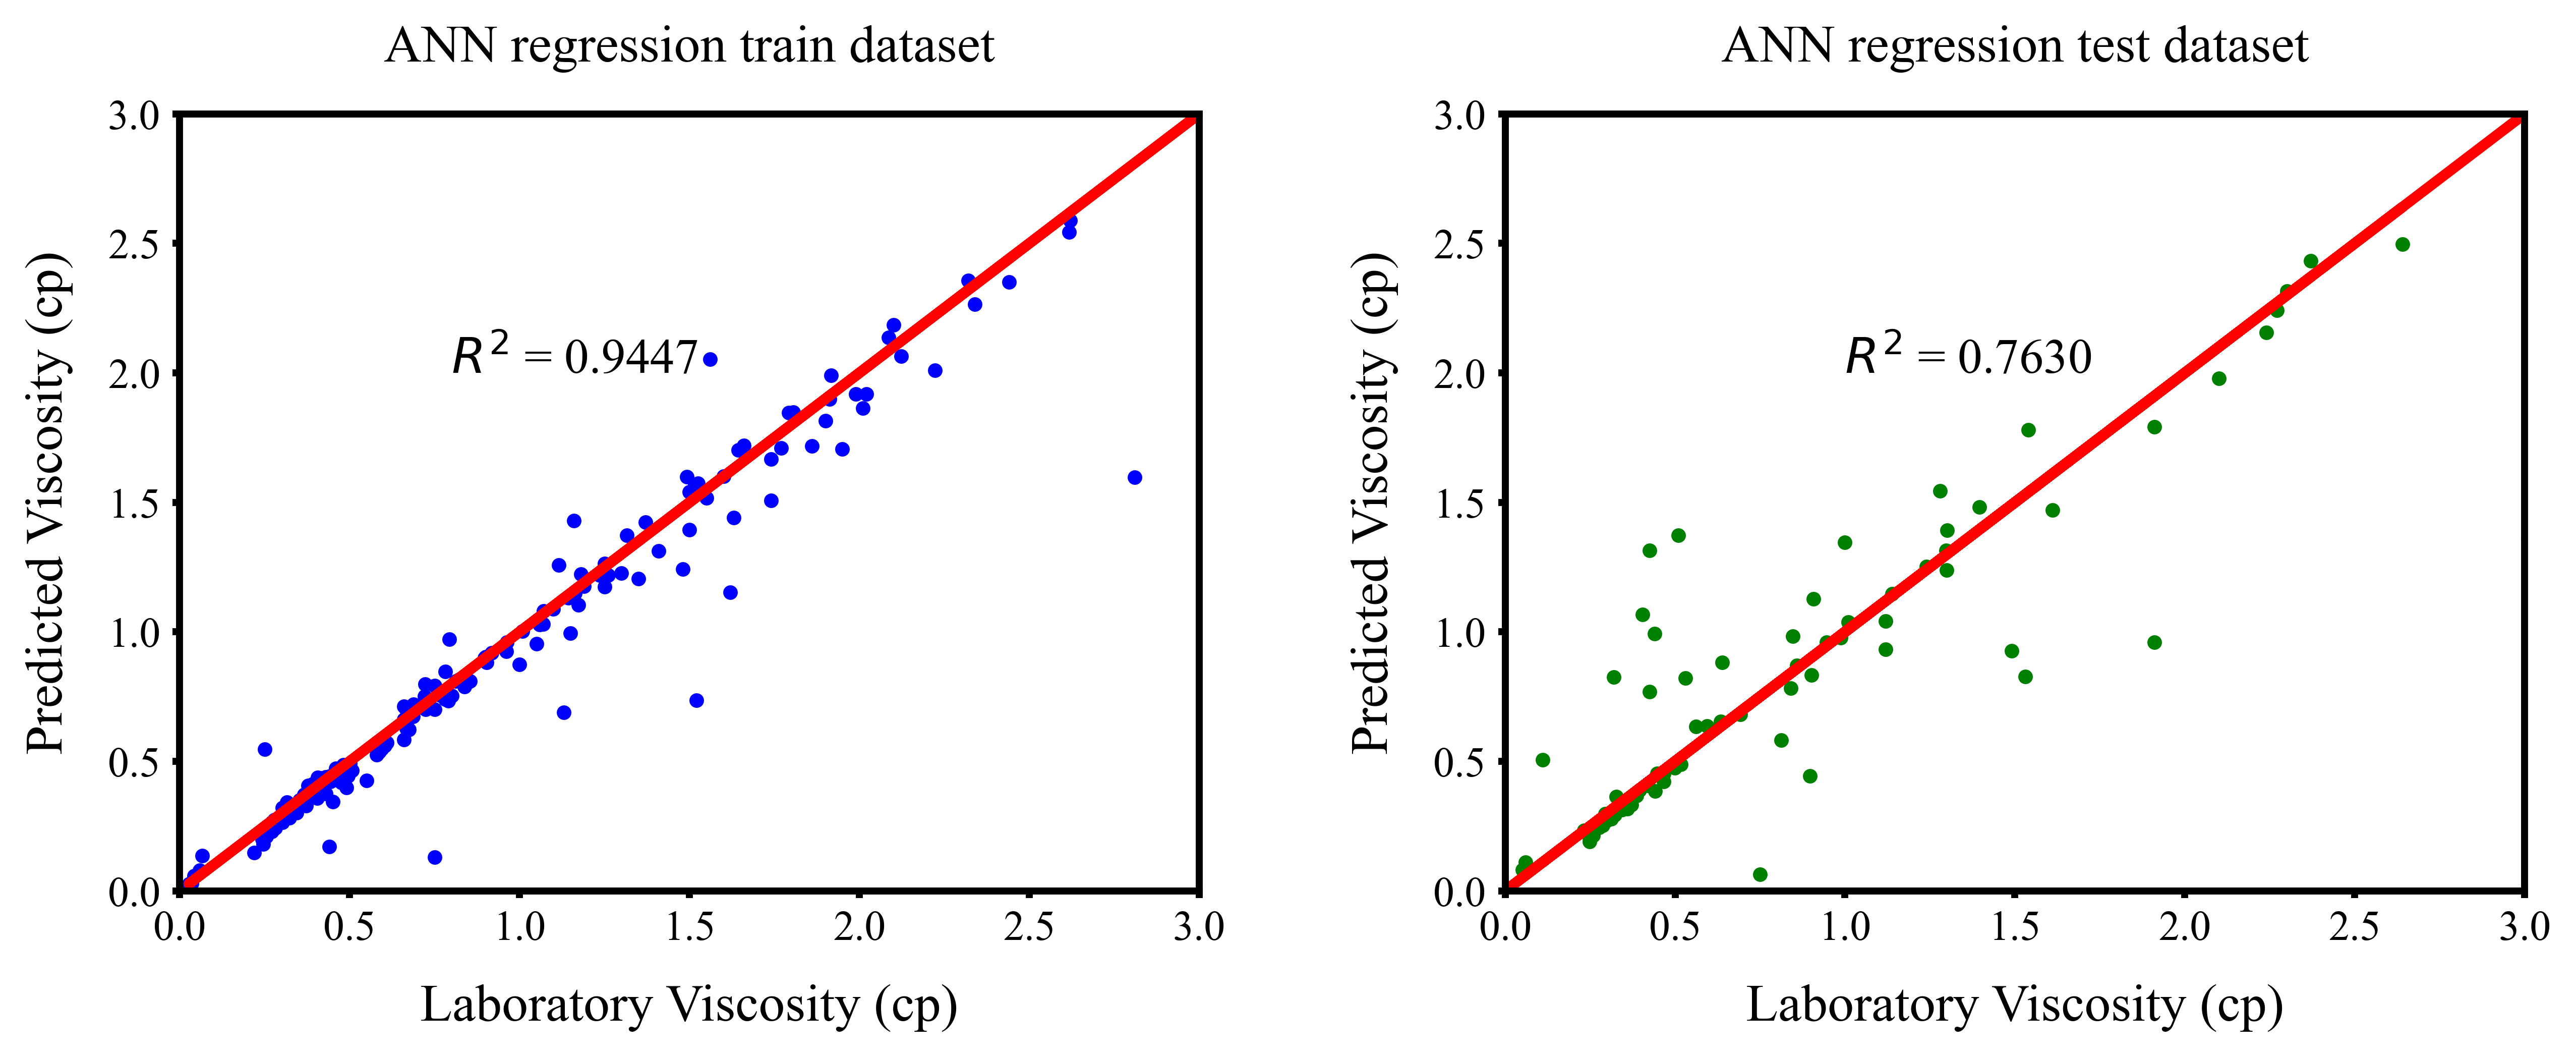

In [167]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_ann = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , ann_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 0.8,2, "$R^2$ = {:.4f}".format(ann_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , ann_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(ann_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3) 

fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [168]:
ann_MSE_train = mean_squared_error(y_train,ann_regression_train_Prediction)
ann_MAE_train = mean_absolute_error(y_train,ann_regression_train_Prediction)
ann_MSE_test  = mean_squared_error(y_test,ann_regression_test_Prediction)
ann_MAE_test  = mean_absolute_error(y_test,ann_regression_test_Prediction)
print(ann_MSE_train , ann_MAE_train , ann_MSE_test , ann_MAE_test )

0.0221736862402672 0.06861692725660343 0.10146137138667746 0.16293234209433163


## 7. XGB Model

In [169]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [170]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9452130101134382 0.704975266733427


In [171]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Viscosity (train)"] = y_train
result_xgb_train["Predicted Viscosity (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Viscosity (train)"] - result_xgb_train["Predicted Viscosity (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Viscosity (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Viscosity (test)"] = y_test
result_xgb_test["Predicted Viscosity (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Viscosity (test)"] - result_xgb_test["Predicted Viscosity (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Viscosity (test)"]




<ipython-input-176-e3037bb4b142>:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-176-e3037bb4b142>:43: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


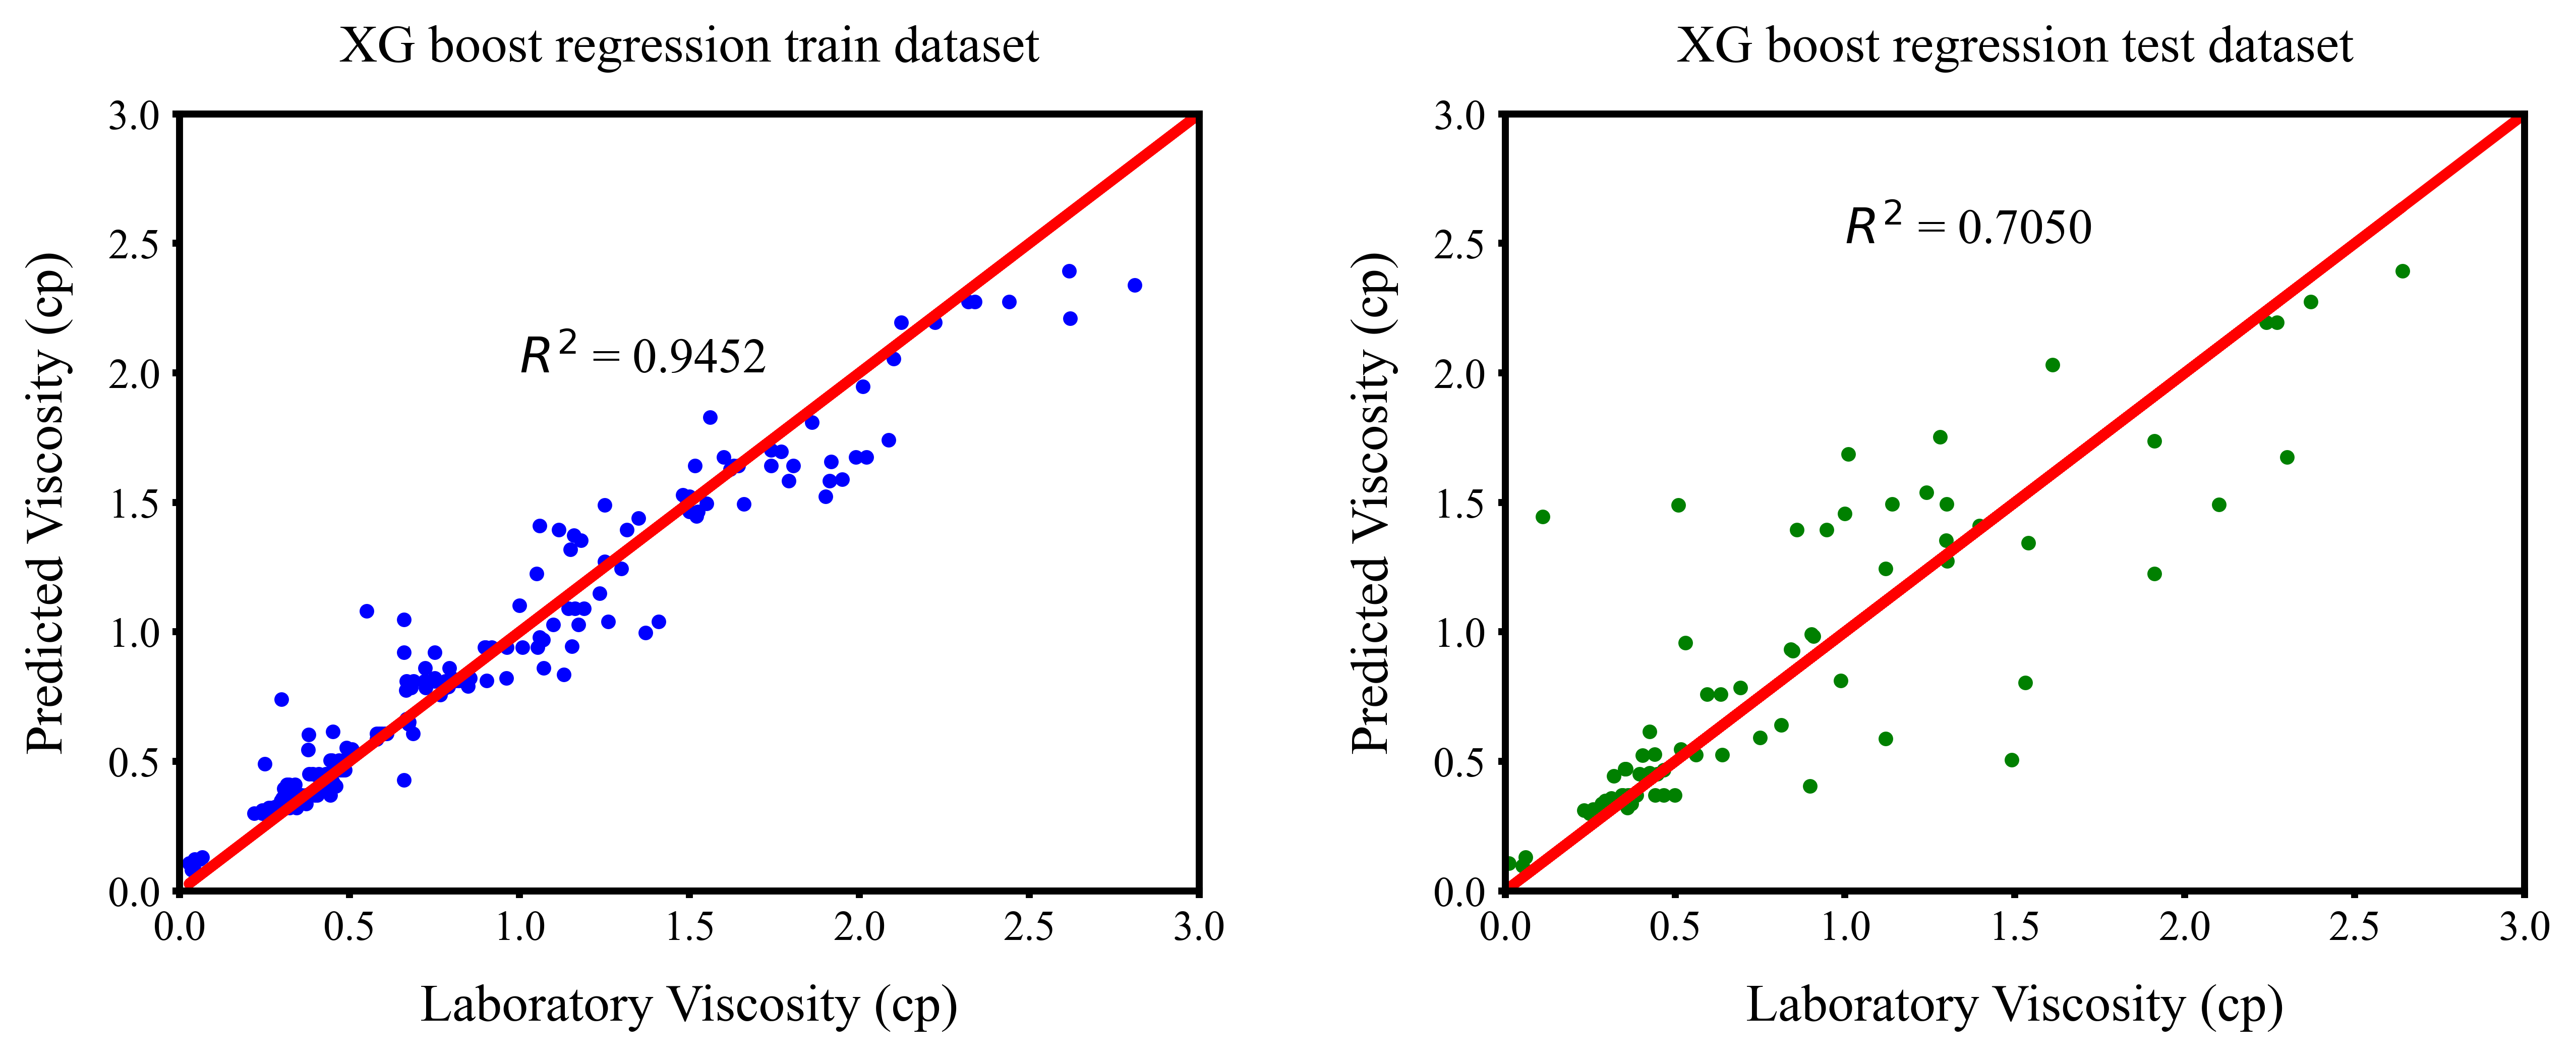

In [176]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2.5, "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [173]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

0.021956658762738612 0.09473704952051902 0.12631417524379931 0.2055643455064437


In [174]:
result_xgb_train.describe()

Viscosity (train)  Predicted Viscosity (train)    Residues  \
count         198.000000                   198.000000  198.000000   
mean            0.849850                     0.849850    0.094737   
std             0.634664                     0.564304    0.114225   
min             0.027323                     0.081816    0.000314   
25%             0.353803                     0.369900    0.027541   
50%             0.666888                     0.748840    0.054071   
75%             1.171250                     1.136941    0.101308   
max             3.390000                     2.634320    0.755680   

       Absolute Error (%)  
count          198.000000  
mean            16.962658  
std             30.798702  
min              0.070911  
25%              3.674797  
50%              9.424889  
75%             17.354493  
max            287.407749

In [175]:
result_xgb_test.describe()

Viscosity (test)  Predicted Viscosity (test)      Residues  \
count         85.000000                   85.000000  8.500000e+01   
mean           0.792203                    0.808389  2.055643e-01   
std            0.658213                    0.585127  2.916473e-01   
min            0.011569                    0.097183  6.867237e-07   
25%            0.321901                    0.347691  3.808521e-02   
50%            0.499180                    0.524907  8.662277e-02   
75%            1.120000                    1.343947  1.945509e-01   
max            3.010000                    2.393471  1.488351e+00   

       Absolute Error (%)  
count           85.000000  
mean            47.876934  
std            156.494861  
min              0.000147  
25%              8.357253  
50%             16.380400  
75%             32.224424  
max           1213.062148

In [177]:
model_comp_test = pd.DataFrame({
    'Model Name' : ["Linear Regression" , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_testR2  , svr_regression_testR2 ,dt_regression_testR2,rf_regression_testR2,knn_regression_testR2,ann_regression_testR2,xgb_regression_testR2],
    'MSE' : [lr_MSE_test  , svr_MSE_test , dt_MSE_test ,  rf_MSE_test ,knn_MSE_test,ann_MSE_test,xgb_MSE_test],
    'MAE' : [lr_MAE_test  , svr_MAE_test , dt_MAE_test ,  rf_MAE_test ,knn_MAE_test,ann_MAE_test,xgb_MAE_test],
    '%AAD' : [result_lr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_test.describe()["Absolute Error (%)"].loc["mean"],
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [178]:
model_comp_test

Model Name  R Square       MSE       MAE       %AAD
0  Linear Regression  0.643497  0.152636  0.261063  80.183489
1                SVM  0.645871  0.151619  0.211468  60.103801
2      Decision Tree  0.640083  0.154097  0.222756  33.810004
3      Random Forest  0.765285  0.100493  0.169303  40.288840
4                KNN  0.719506  0.120093  0.178417  37.227161
5                ANN  0.763023  0.101461  0.162932  31.328034
6                XGB  0.704975  0.126314  0.205564  47.876934

In [179]:
model_comp_train = pd.DataFrame({
    'Model Name' : ["Linear Regression"  , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN','ANN',"XGB"],
    'R Square' : [linear_regression_trainR2  , svr_regression_trainR2 ,dt_regression_trainR2,rf_regression_trainR2,knn_regression_trainR2,ann_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [lr_MSE_train , svr_MSE_train , dt_MSE_train ,  rf_MSE_train ,knn_MSE_train,ann_MSE_train,xgb_MSE_train],
    'MAE' : [lr_MAE_train  , svr_MAE_train , dt_MAE_train ,  rf_MAE_train ,knn_MAE_train,ann_MAE_train,xgb_MSE_train],
    '%AAD' : [result_lr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [180]:
model_comp_train

Model Name  R Square       MSE       MAE       %AAD
0  Linear Regression  0.614942  0.154317  0.268575  55.372831
1                SVM  0.965430  0.013855  0.081658  18.595443
2      Decision Tree  0.862426  0.055135  0.103590  12.284230
3      Random Forest  0.959948  0.016051  0.053745   7.893801
4                KNN  0.859661  0.056243  0.112810  12.729506
5                ANN  0.944671  0.022174  0.068617   9.288394
6                XGB  0.945213  0.021957  0.021957  16.962658

## Preparing Dataframe containing result of all models evaluation parameters

#### 1. For test dataset

In [181]:


model_comp_test_paper = pd.DataFrame({
    'Model Name' : ['LR','SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_testR2, svr_regression_testR2 ,dt_regression_testR2,rf_regression_testR2,knn_regression_testR2,ann_regression_testR2,xgb_regression_testR2],
    'MSE' : [lr_MSE_test,svr_MSE_test , dt_MSE_test ,  rf_MSE_test ,knn_MSE_test,ann_MSE_test,xgb_MSE_test],
    'MAE' : [lr_MAE_test,svr_MAE_test , dt_MAE_test ,  rf_MAE_test ,knn_MAE_test,ann_MAE_test,xgb_MAE_test],
    '%AARD' : [result_lr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_test.describe()["Absolute Error (%)"].loc["mean"],
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [182]:
model_comp_test_paper.to_excel(export_data_path+"Result_Compare_test.xlsx",index = False)

#### 2. For train dataset

In [183]:
model_comp_train_paper = pd.DataFrame({
    'Model Name' : ['LR','SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [linear_regression_trainR2,svr_regression_trainR2 ,dt_regression_trainR2,rf_regression_trainR2,knn_regression_trainR2,ann_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [lr_MSE_train,svr_MSE_train , dt_MSE_train ,  rf_MSE_train ,knn_MSE_train,ann_MSE_train,xgb_MSE_train],
    'MAE' : [ lr_MAE_train , svr_MAE_train , dt_MAE_train ,  rf_MAE_train ,knn_MAE_train,ann_MAE_train,xgb_MSE_train],
    '%AARD' : [result_lr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [184]:
model_comp_train_paper.to_excel(export_data_path+"Result_Compare_train.xlsx")

In [185]:
#Creating Dataframe For bar plot by adding label train and test and merging both dataframe

model_comp_test_paper["Label"] = "Test"
model_comp_train_paper["Label"] = "Train"
Final_bar_plot = model_comp_test_paper.append(model_comp_train_paper)
Final_bar_plot

Model Name  R Square       MSE       MAE      %AARD  Label
0         LR  0.643497  0.152636  0.261063  80.183489   Test
1        SVR  0.645871  0.151619  0.211468  60.103801   Test
2         DT  0.640083  0.154097  0.222756  33.810004   Test
3         RF  0.765285  0.100493  0.169303  40.288840   Test
4        KNN  0.719506  0.120093  0.178417  37.227161   Test
5        ANN  0.763023  0.101461  0.162932  31.328034   Test
6        XGB  0.704975  0.126314  0.205564  47.876934   Test
0         LR  0.614942  0.154317  0.268575  55.372831  Train
1        SVR  0.965430  0.013855  0.081658  18.595443  Train
2         DT  0.862426  0.055135  0.103590  12.284230  Train
3         RF  0.959948  0.016051  0.053745   7.893801  Train
4        KNN  0.859661  0.056243  0.112810  12.729506  Train
5        ANN  0.944671  0.022174  0.068617   9.288394  Train
6        XGB  0.945213  0.021957  0.021957  16.962658  Train

## Bar plot which comparing the % AARD values

<ipython-input-190-d2ae10fe546f>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-190-d2ae10fe546f>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")


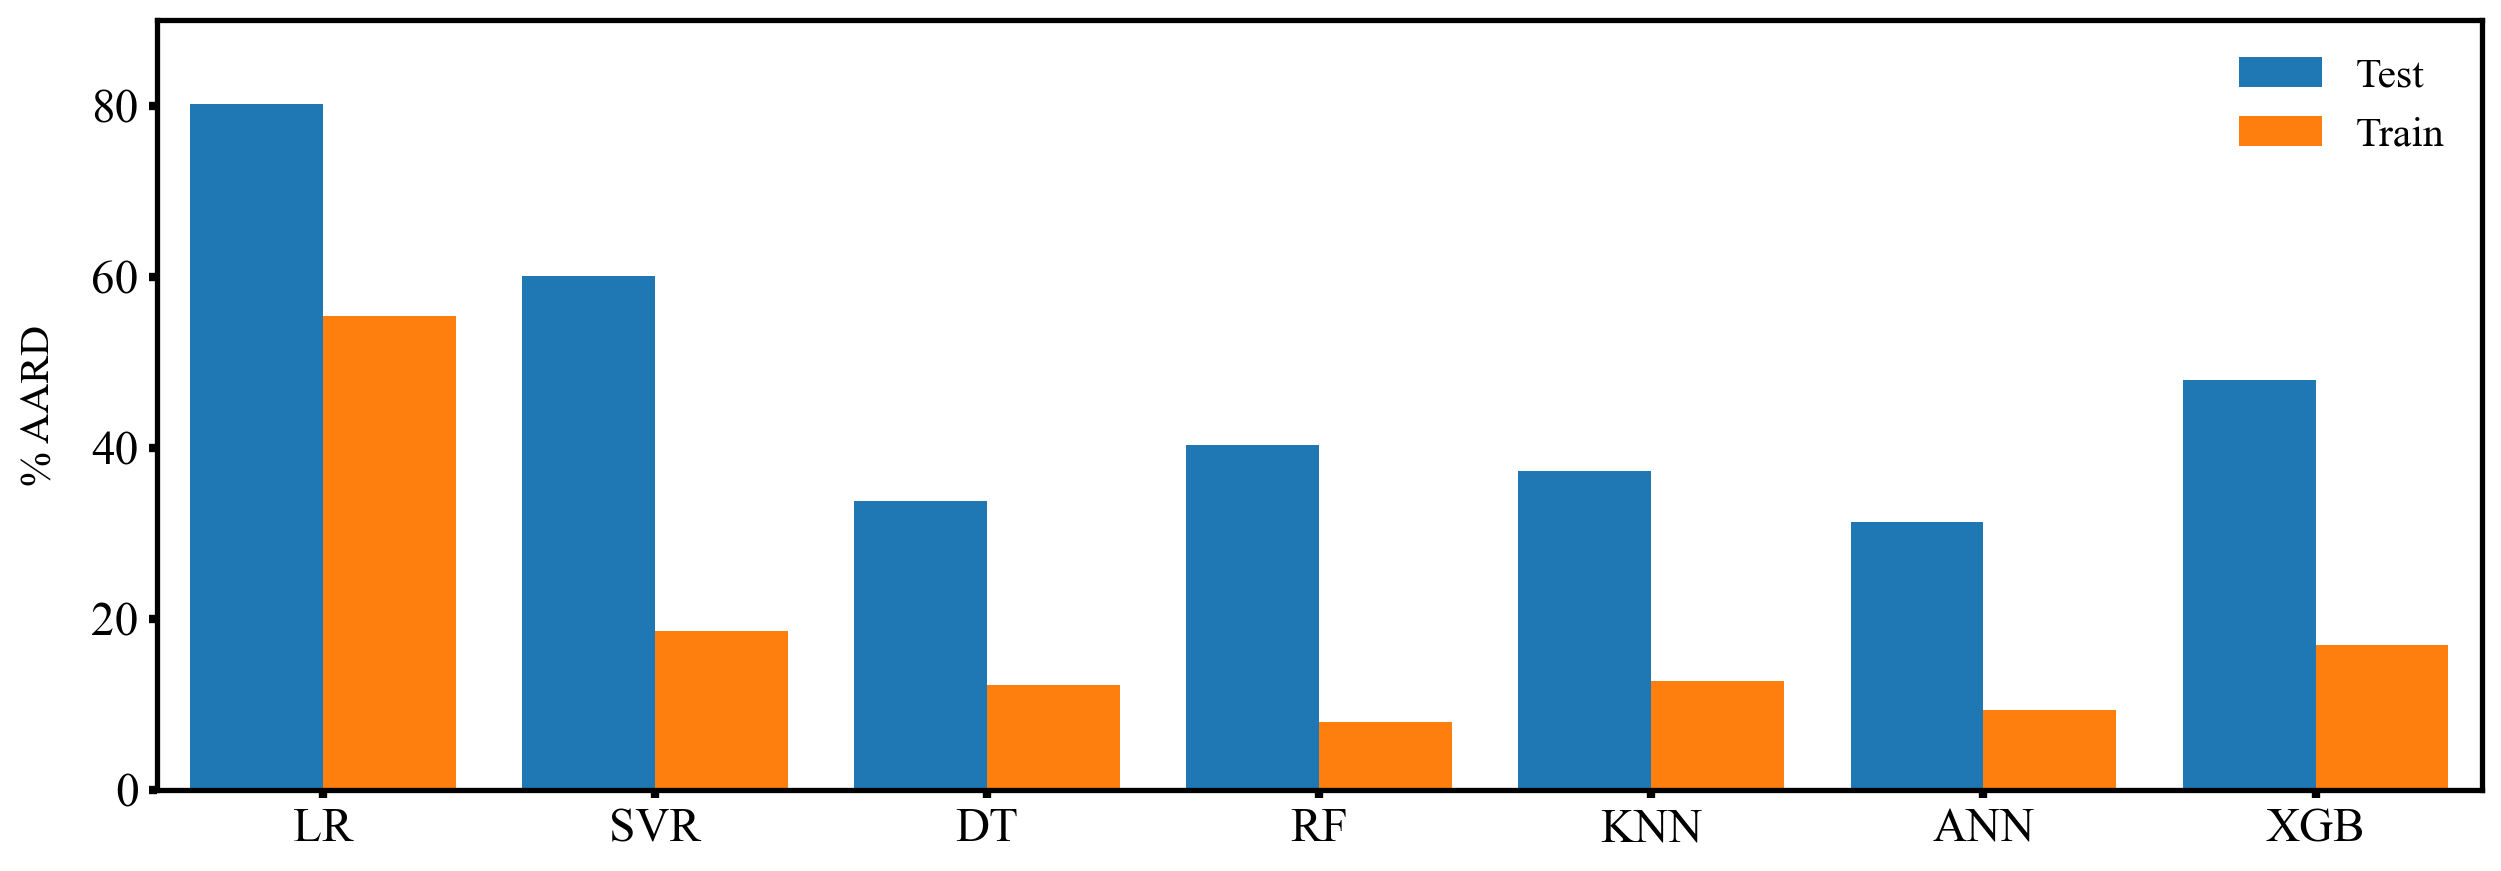

In [190]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_aard = plt.figure(figsize = (15,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "%AARD" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("% AARD" , fontsize = 15 , labelpad = 12)
plt.ylim((0,90))
ax.set(xlabel = None)


ax = fig_aard.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_aard.savefig(figure_path + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-195-b67ea5f86b1c>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-195-b67ea5f86b1c>:25: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


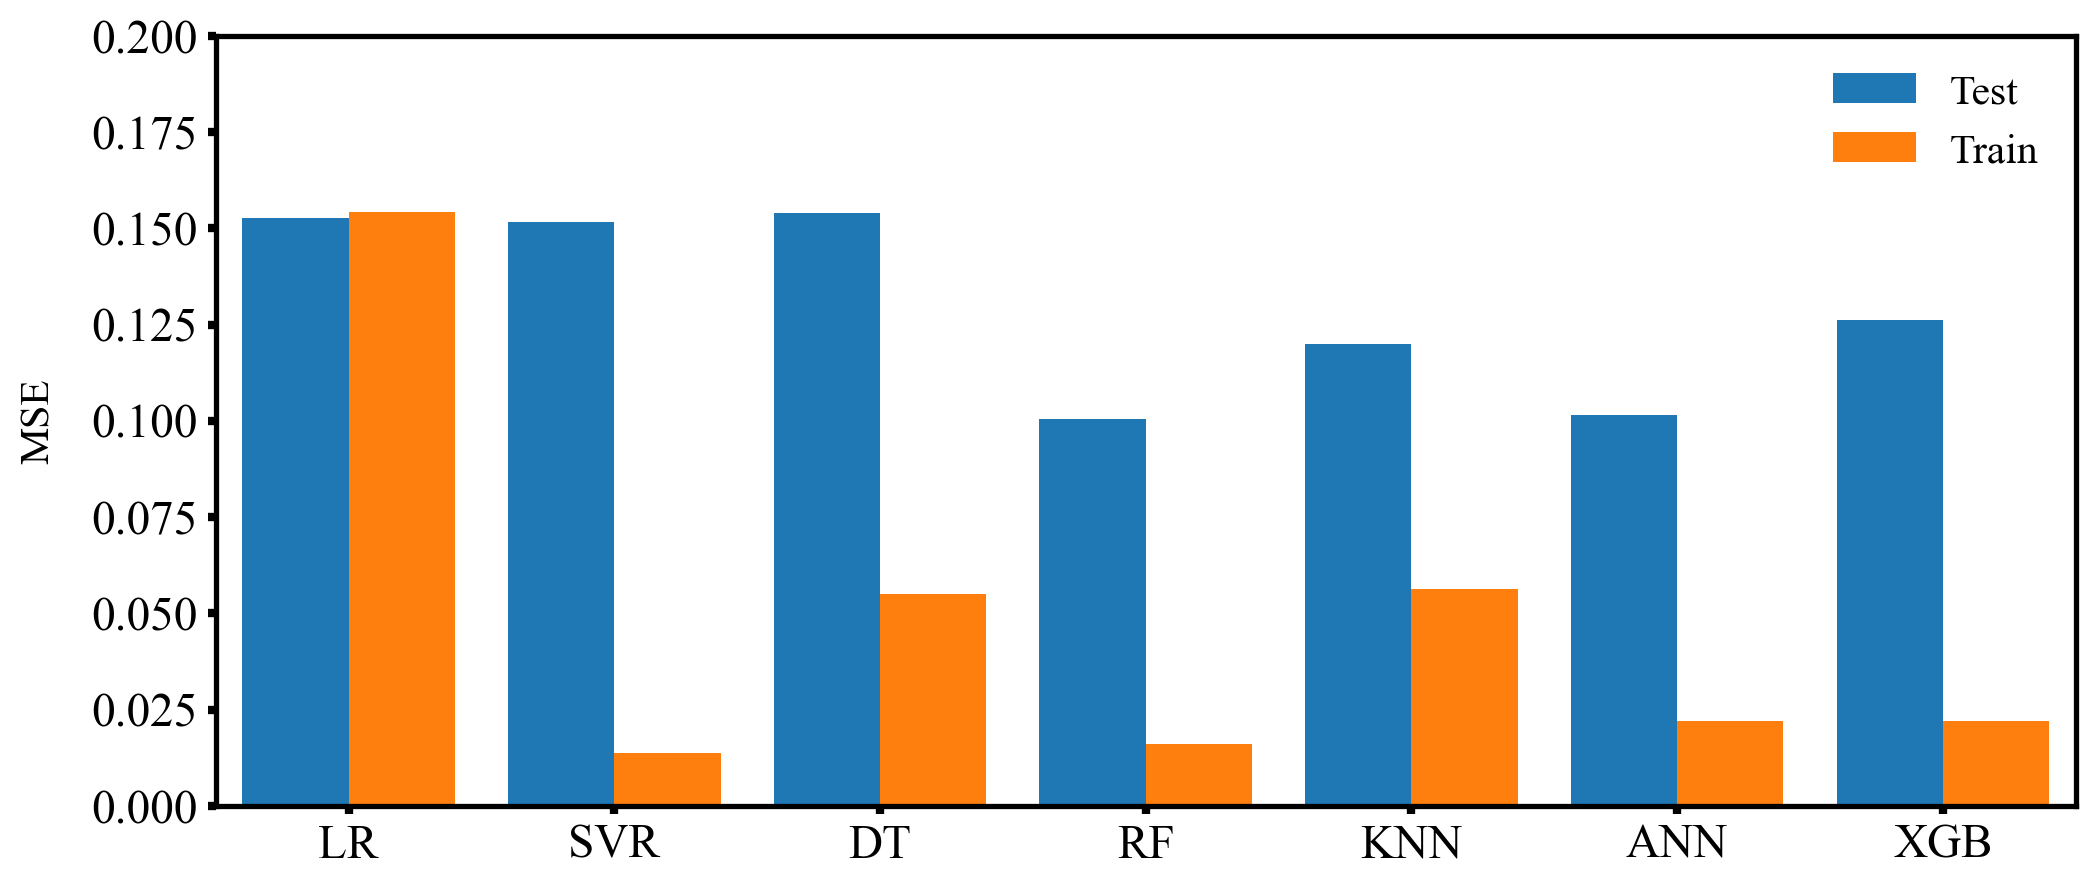

In [195]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_mse = plt.figure(figsize = (12,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "MSE" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("MSE" , fontsize = 15 , labelpad = 12)
ax.set(xlabel = None)
plt.ylim((0,0.2))


ax = fig_mse.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

## Creating Dataframes for closeness result plots and comaparision for residuals plots

In [197]:
lr_plot_result = result_lr_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
svr_plot_result = result_svr_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
dt_plot_result = result_dt_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
rf_plot_result = result_rf_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
knn_plot_result = result_knn_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
ann_plot_result = result_ann_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)
xgb_plot_result = result_xgb_test[["Viscosity (test)","Predicted Viscosity (test)"]].reset_index(drop=True)

lr_plot_result["Residual"] = lr_plot_result["Viscosity (test)"] - lr_plot_result["Predicted Viscosity (test)"]
svr_plot_result["Residual"] = svr_plot_result["Viscosity (test)"] - svr_plot_result["Predicted Viscosity (test)"]
dt_plot_result["Residual"] = dt_plot_result["Viscosity (test)"] - dt_plot_result["Predicted Viscosity (test)"]
rf_plot_result["Residual"] = rf_plot_result["Viscosity (test)"] - rf_plot_result["Predicted Viscosity (test)"]
knn_plot_result["Residual"] = knn_plot_result["Viscosity (test)"] - knn_plot_result["Predicted Viscosity (test)"]
ann_plot_result["Residual"] = ann_plot_result["Viscosity (test)"] - ann_plot_result["Predicted Viscosity (test)"]
xgb_plot_result["Residual"] = xgb_plot_result["Viscosity (test)"] - xgb_plot_result["Predicted Viscosity (test)"]

## scatter plot which comparing the residuals values for entire dataset for each saturation pressure records


<ipython-input-198-b02a5da094cc>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-198-b02a5da094cc>:33: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


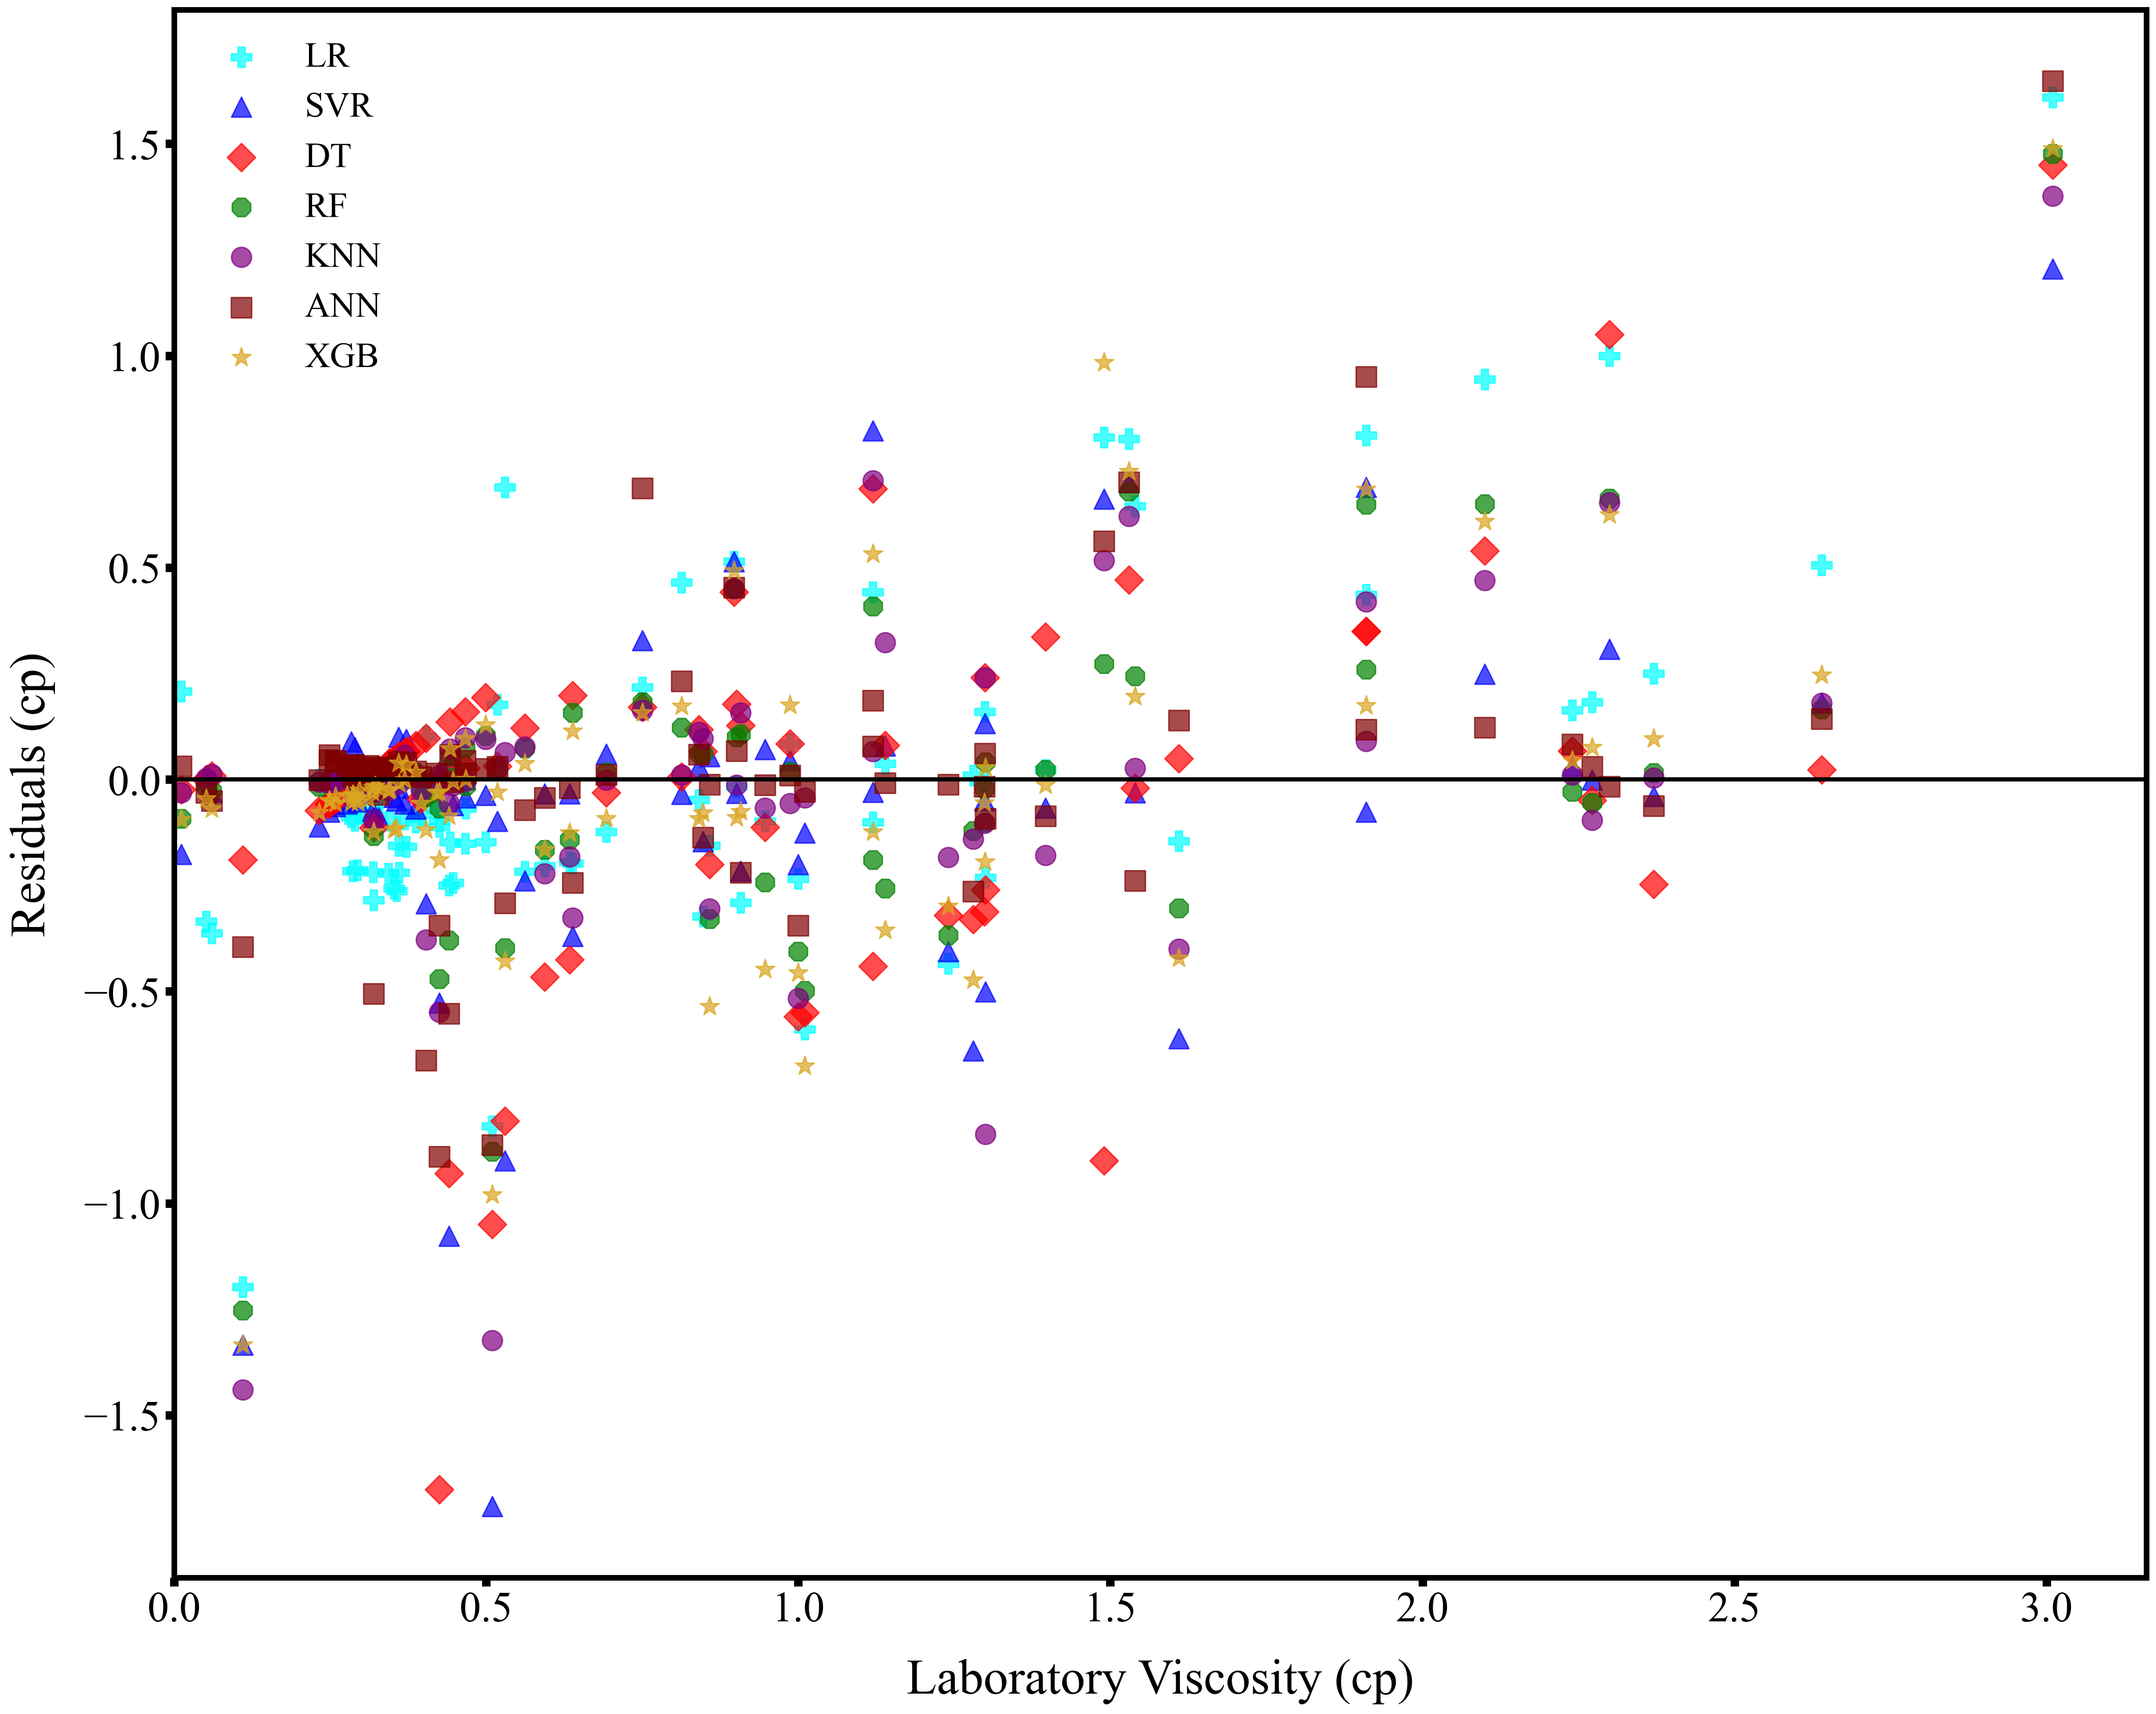

In [198]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_compare_res = plt.figure(figsize = (25,20) , dpi = 200)
plt.scatter(lr_plot_result["Viscosity (test)"] ,lr_plot_result["Residual"] , marker = "P" , s = 200 , c = "Cyan",label = "LR",alpha = 0.7)
plt.scatter(svr_plot_result["Viscosity (test)"] ,svr_plot_result["Residual"] , marker = "^" , s = 200 , c = "blue",label = "SVR",alpha = 0.7)
plt.scatter(dt_plot_result["Viscosity (test)"] ,dt_plot_result["Residual"] , marker = "D" , s = 200 , c = "red",label = "DT",alpha = 0.7)
plt.scatter(rf_plot_result["Viscosity (test)"] ,rf_plot_result["Residual"] , marker = "8" , s = 200 , c = "green",label = "RF",alpha = 0.7)
plt.scatter(knn_plot_result["Viscosity (test)"] ,knn_plot_result["Residual"] , marker = "o" , s = 200 , c = "purple",label = "KNN",alpha = 0.7)
plt.scatter(ann_plot_result["Viscosity (test)"] ,ann_plot_result["Residual"] , marker = "s" , s = 200 , c = "maroon",label = "ANN",alpha = 0.7)
plt.scatter(xgb_plot_result["Viscosity (test)"] ,xgb_plot_result["Residual"] , marker = "*" , s = 200 , c = "goldenrod",label = "XGB",alpha = 0.7)


plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 35, labelpad = 20)
plt.ylabel("Residuals (cp)",fontsize = 35, labelpad = 20)
plt.xlim((0,None))

#Defining axis of graph and increasing width of boarder of box
ax = fig_compare_res.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
    
plt.axhline(y = 0, color = 'black',ls = "-" ,lw = 3)


fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-205-32cef6ae06b5>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-205-32cef6ae06b5>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


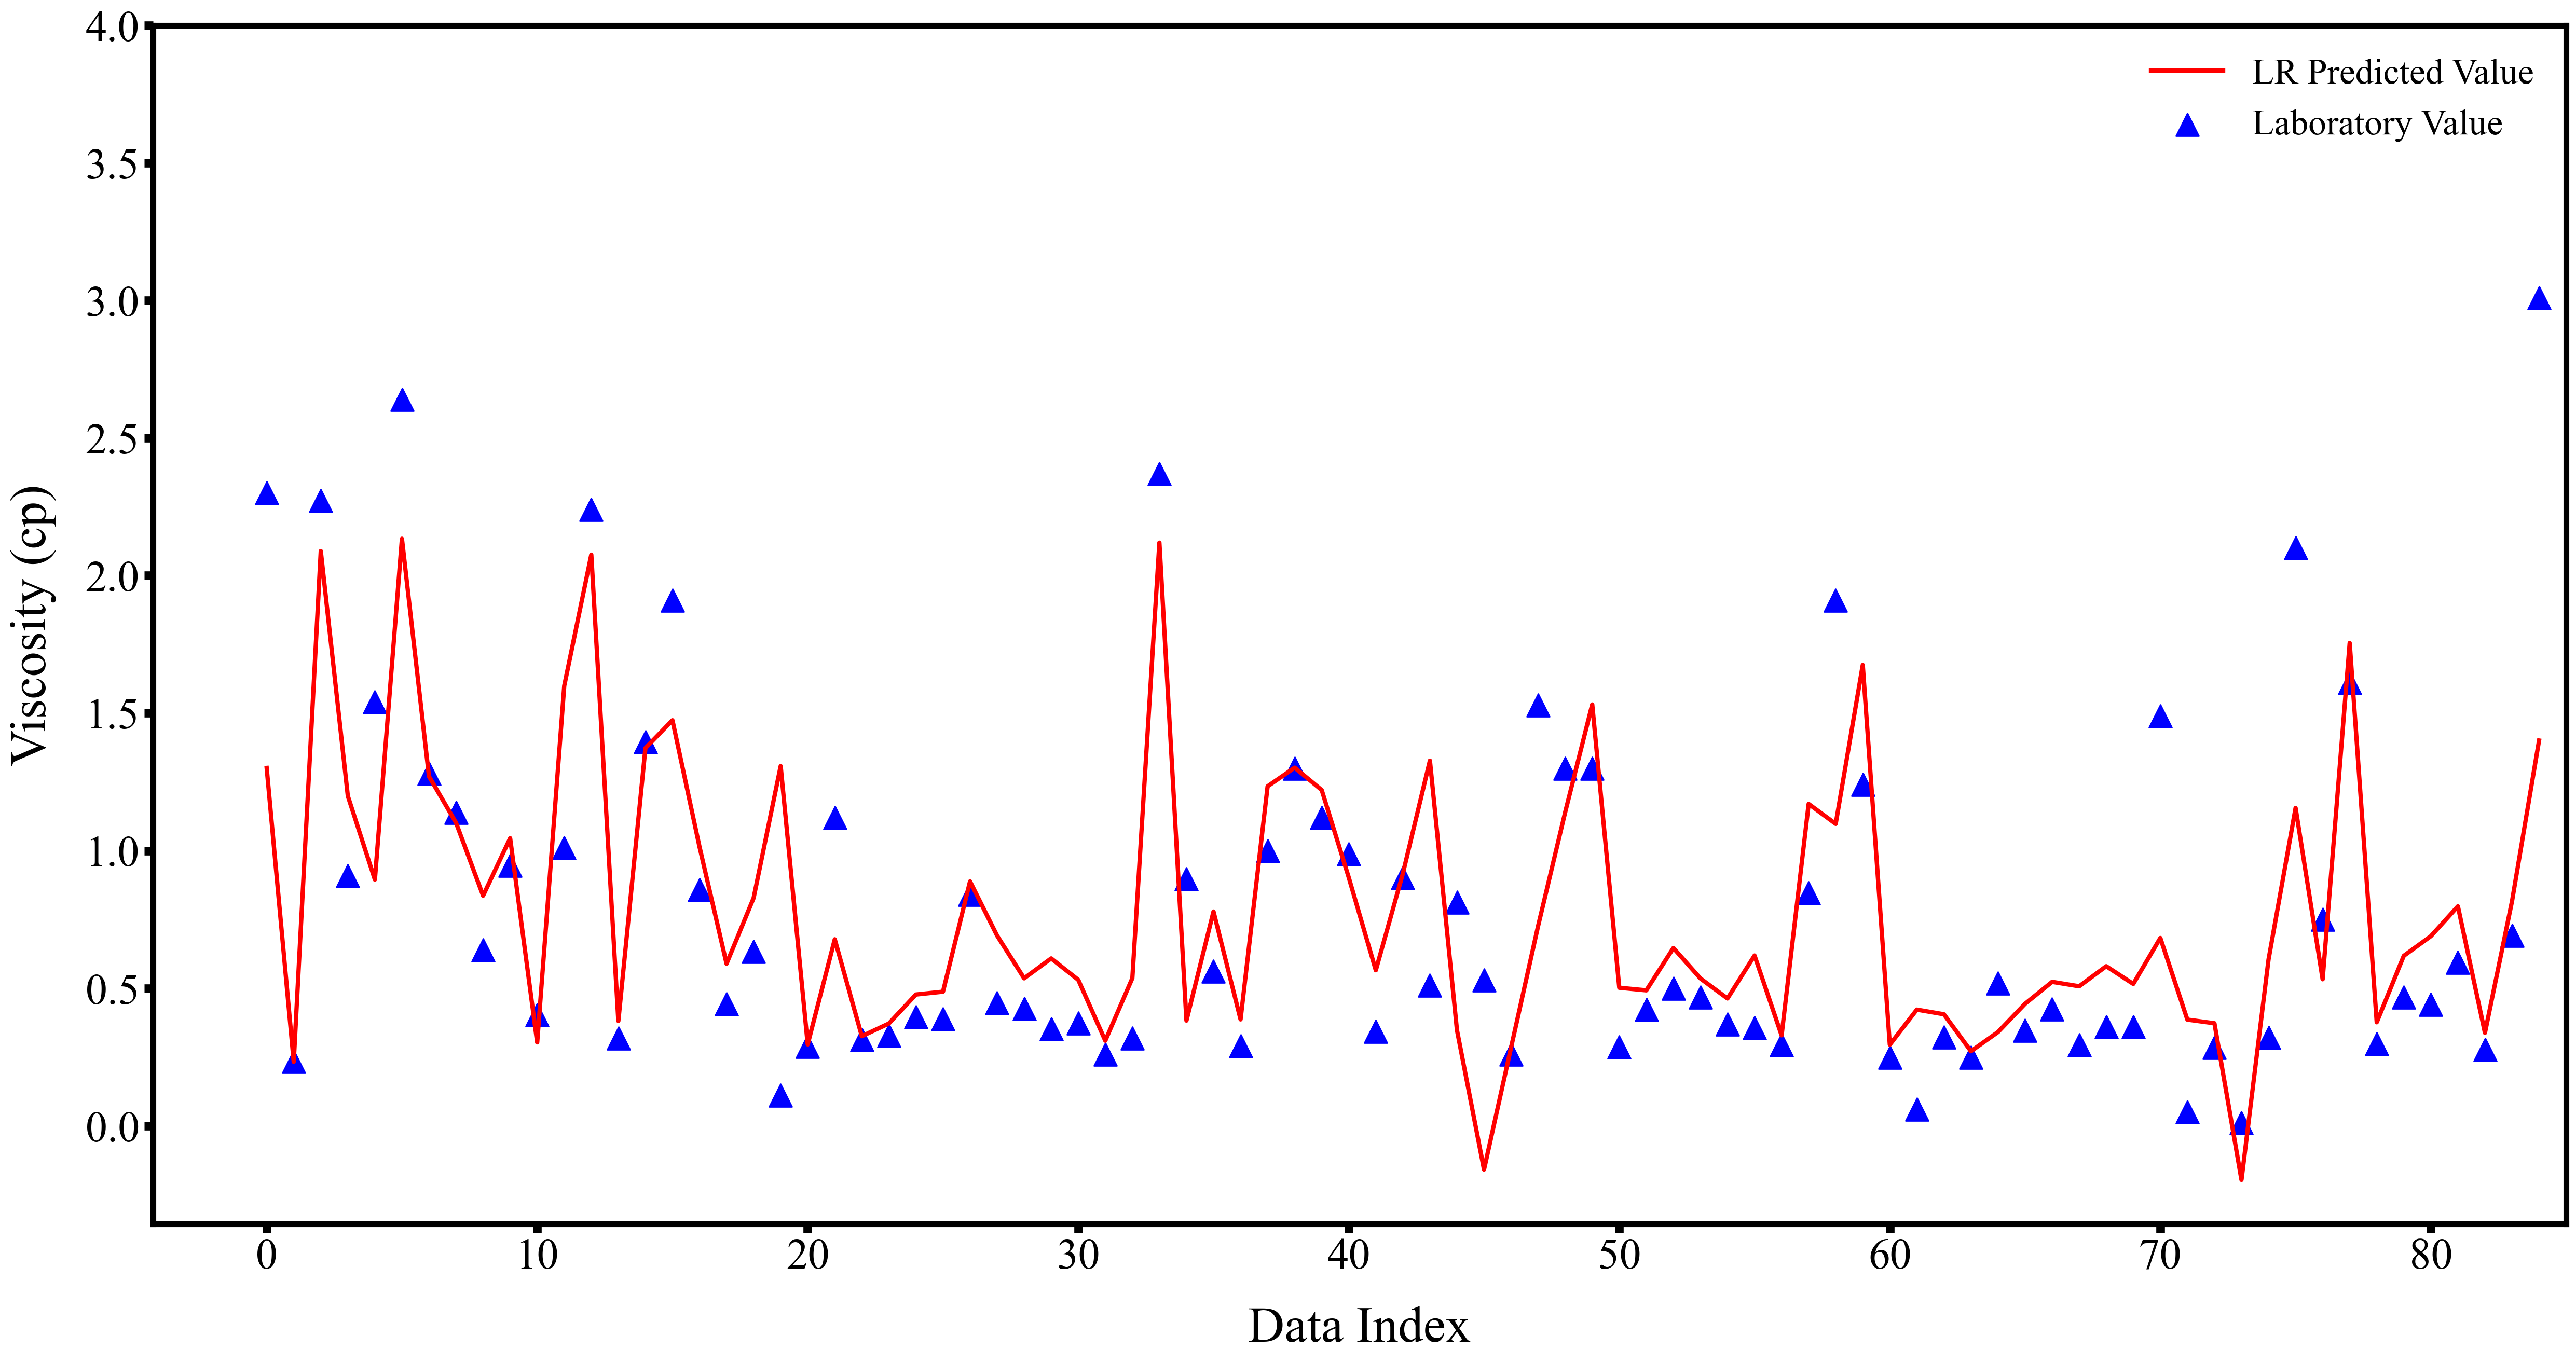

In [205]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_linear2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(lr_plot_result.index ,lr_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(lr_plot_result.index ,lr_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "LR Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)
plt.xlim(None,85)
plt.ylim(None,4)

#Defining axis of graph and increasing width of boarder of box
ax = fig_linear2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_linear2.savefig(figure_path + "linear_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-206-296498f68aad>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-206-296498f68aad>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


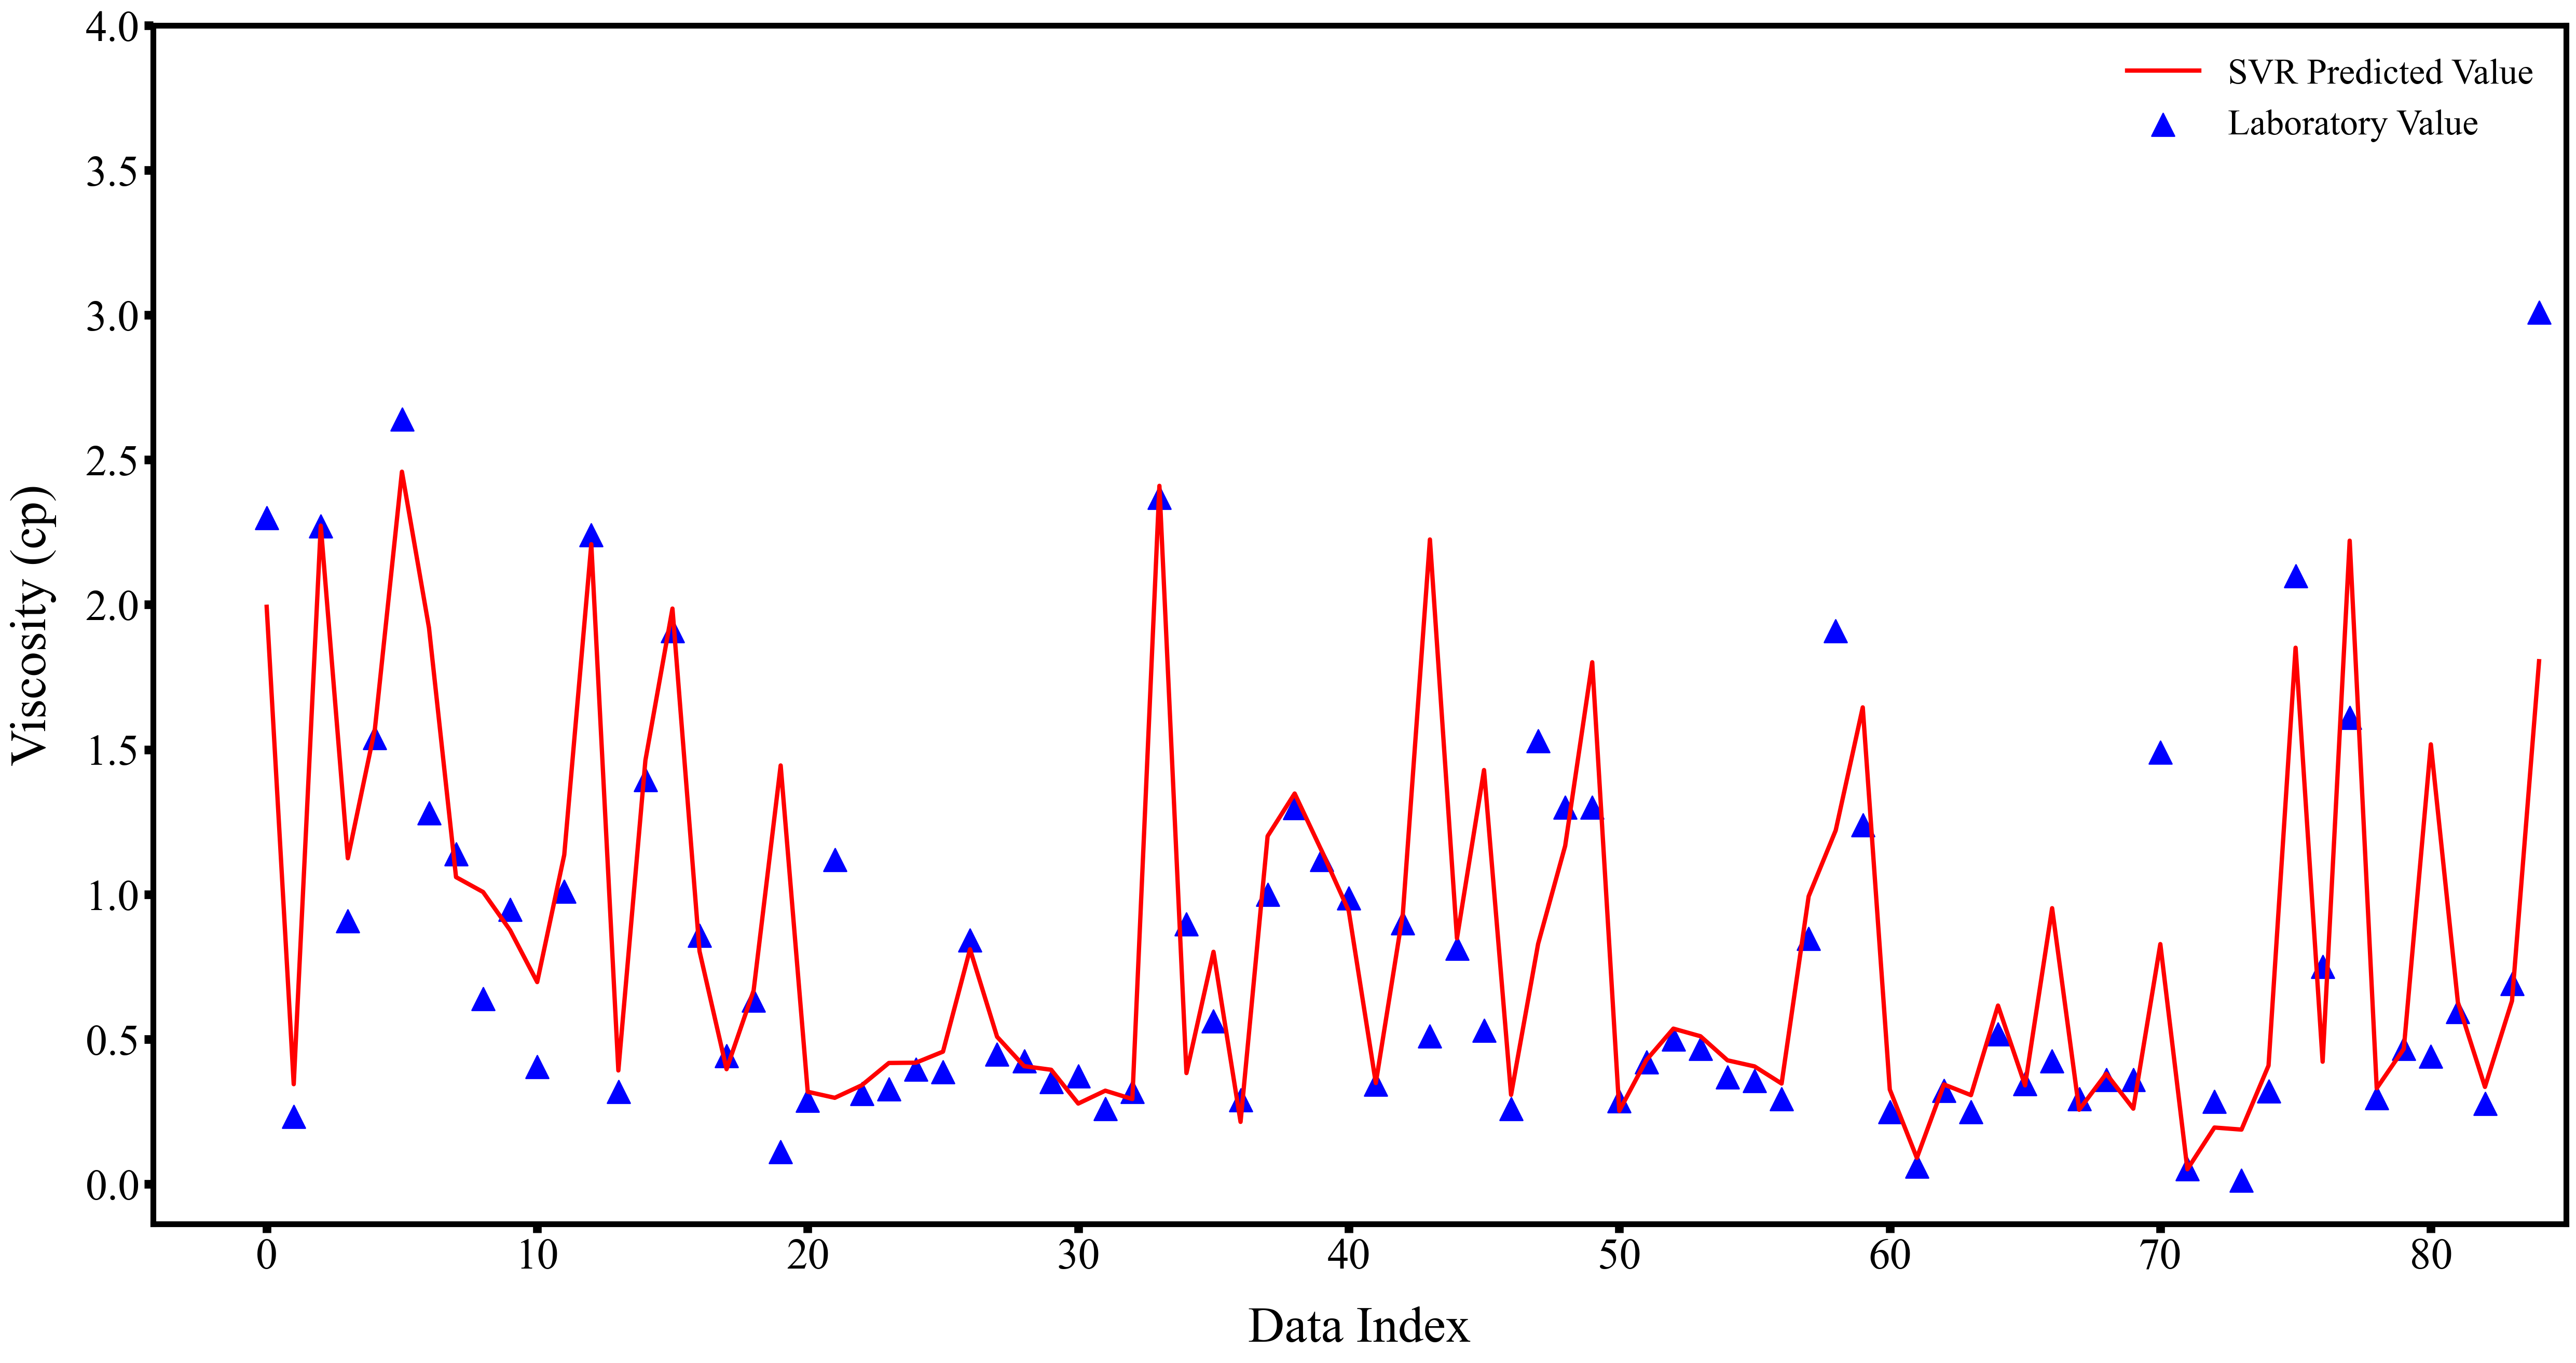

In [206]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_svr2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(svr_plot_result.index ,svr_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(svr_plot_result.index ,svr_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "SVR Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)
plt.xlim(None,85)
plt.ylim(None,4)
#Defining axis of graph and increasing width of boarder of box
ax = fig_svr2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-207-67b157914bba>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-207-67b157914bba>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


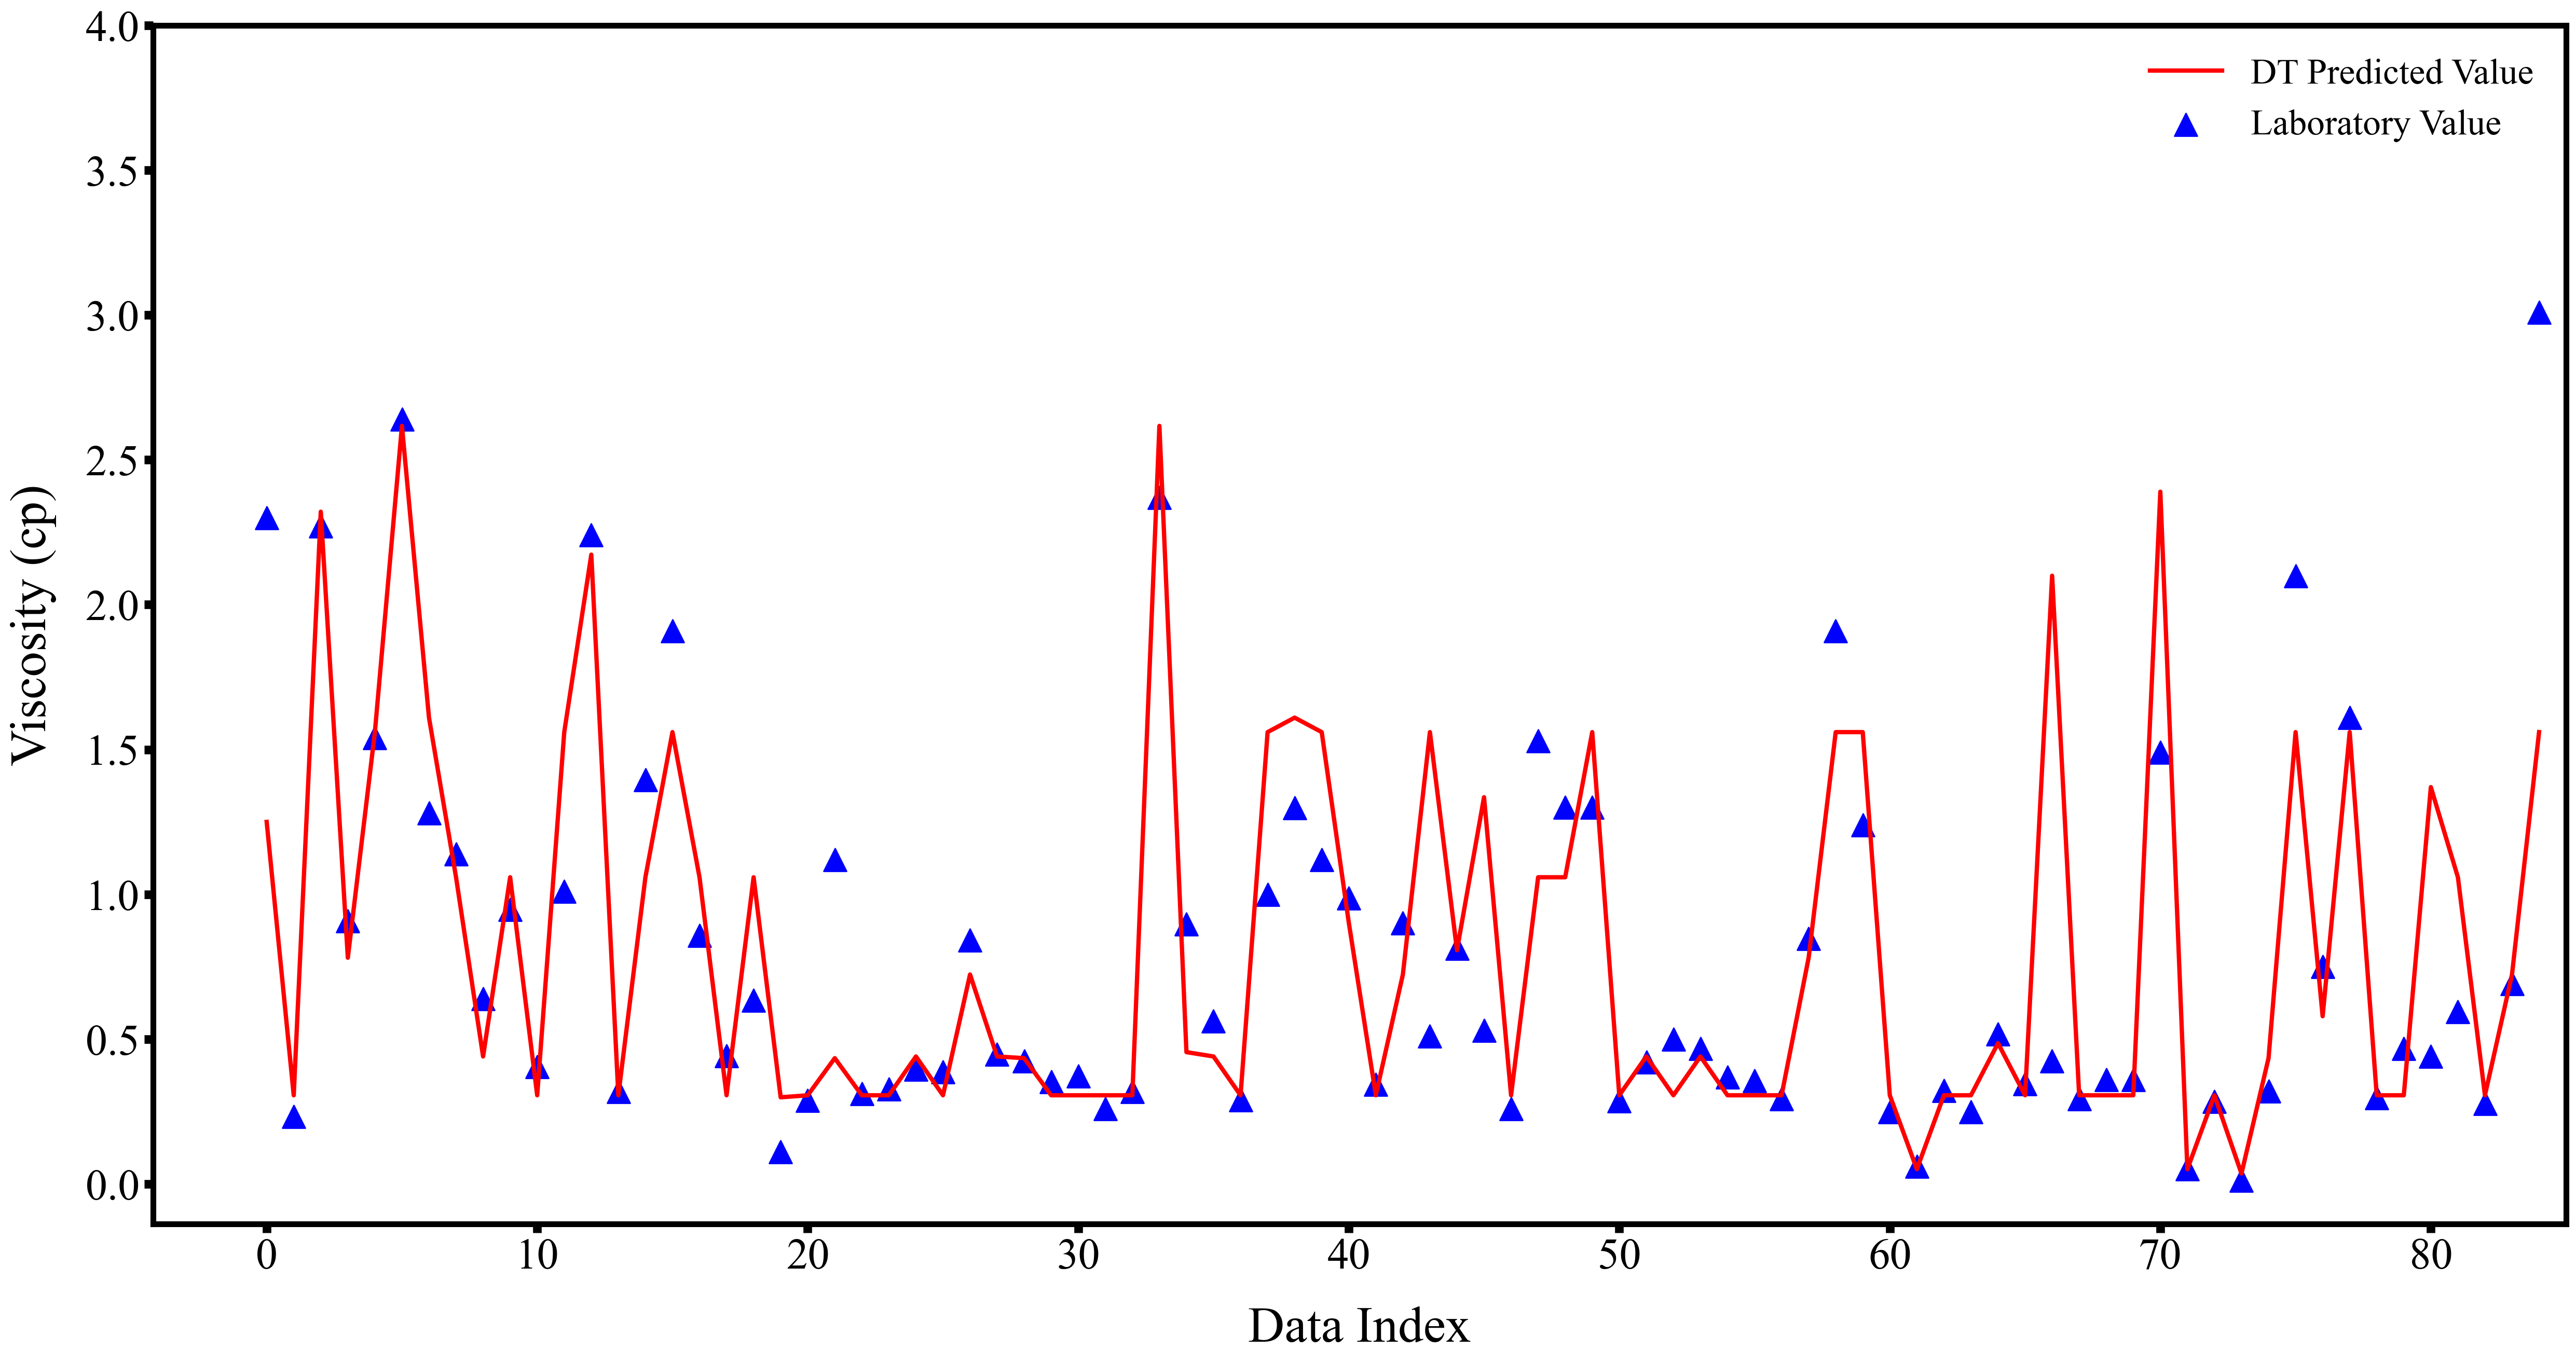

In [207]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_dt2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(dt_plot_result.index ,dt_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(dt_plot_result.index ,dt_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(dt_plot_result.index ,dt_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "DT Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)
plt.xlim(None,85)
plt.ylim(None,4)
#Defining axis of graph and increasing width of boarder of box
ax = fig_dt2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-208-8ad36bb02096>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-208-8ad36bb02096>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


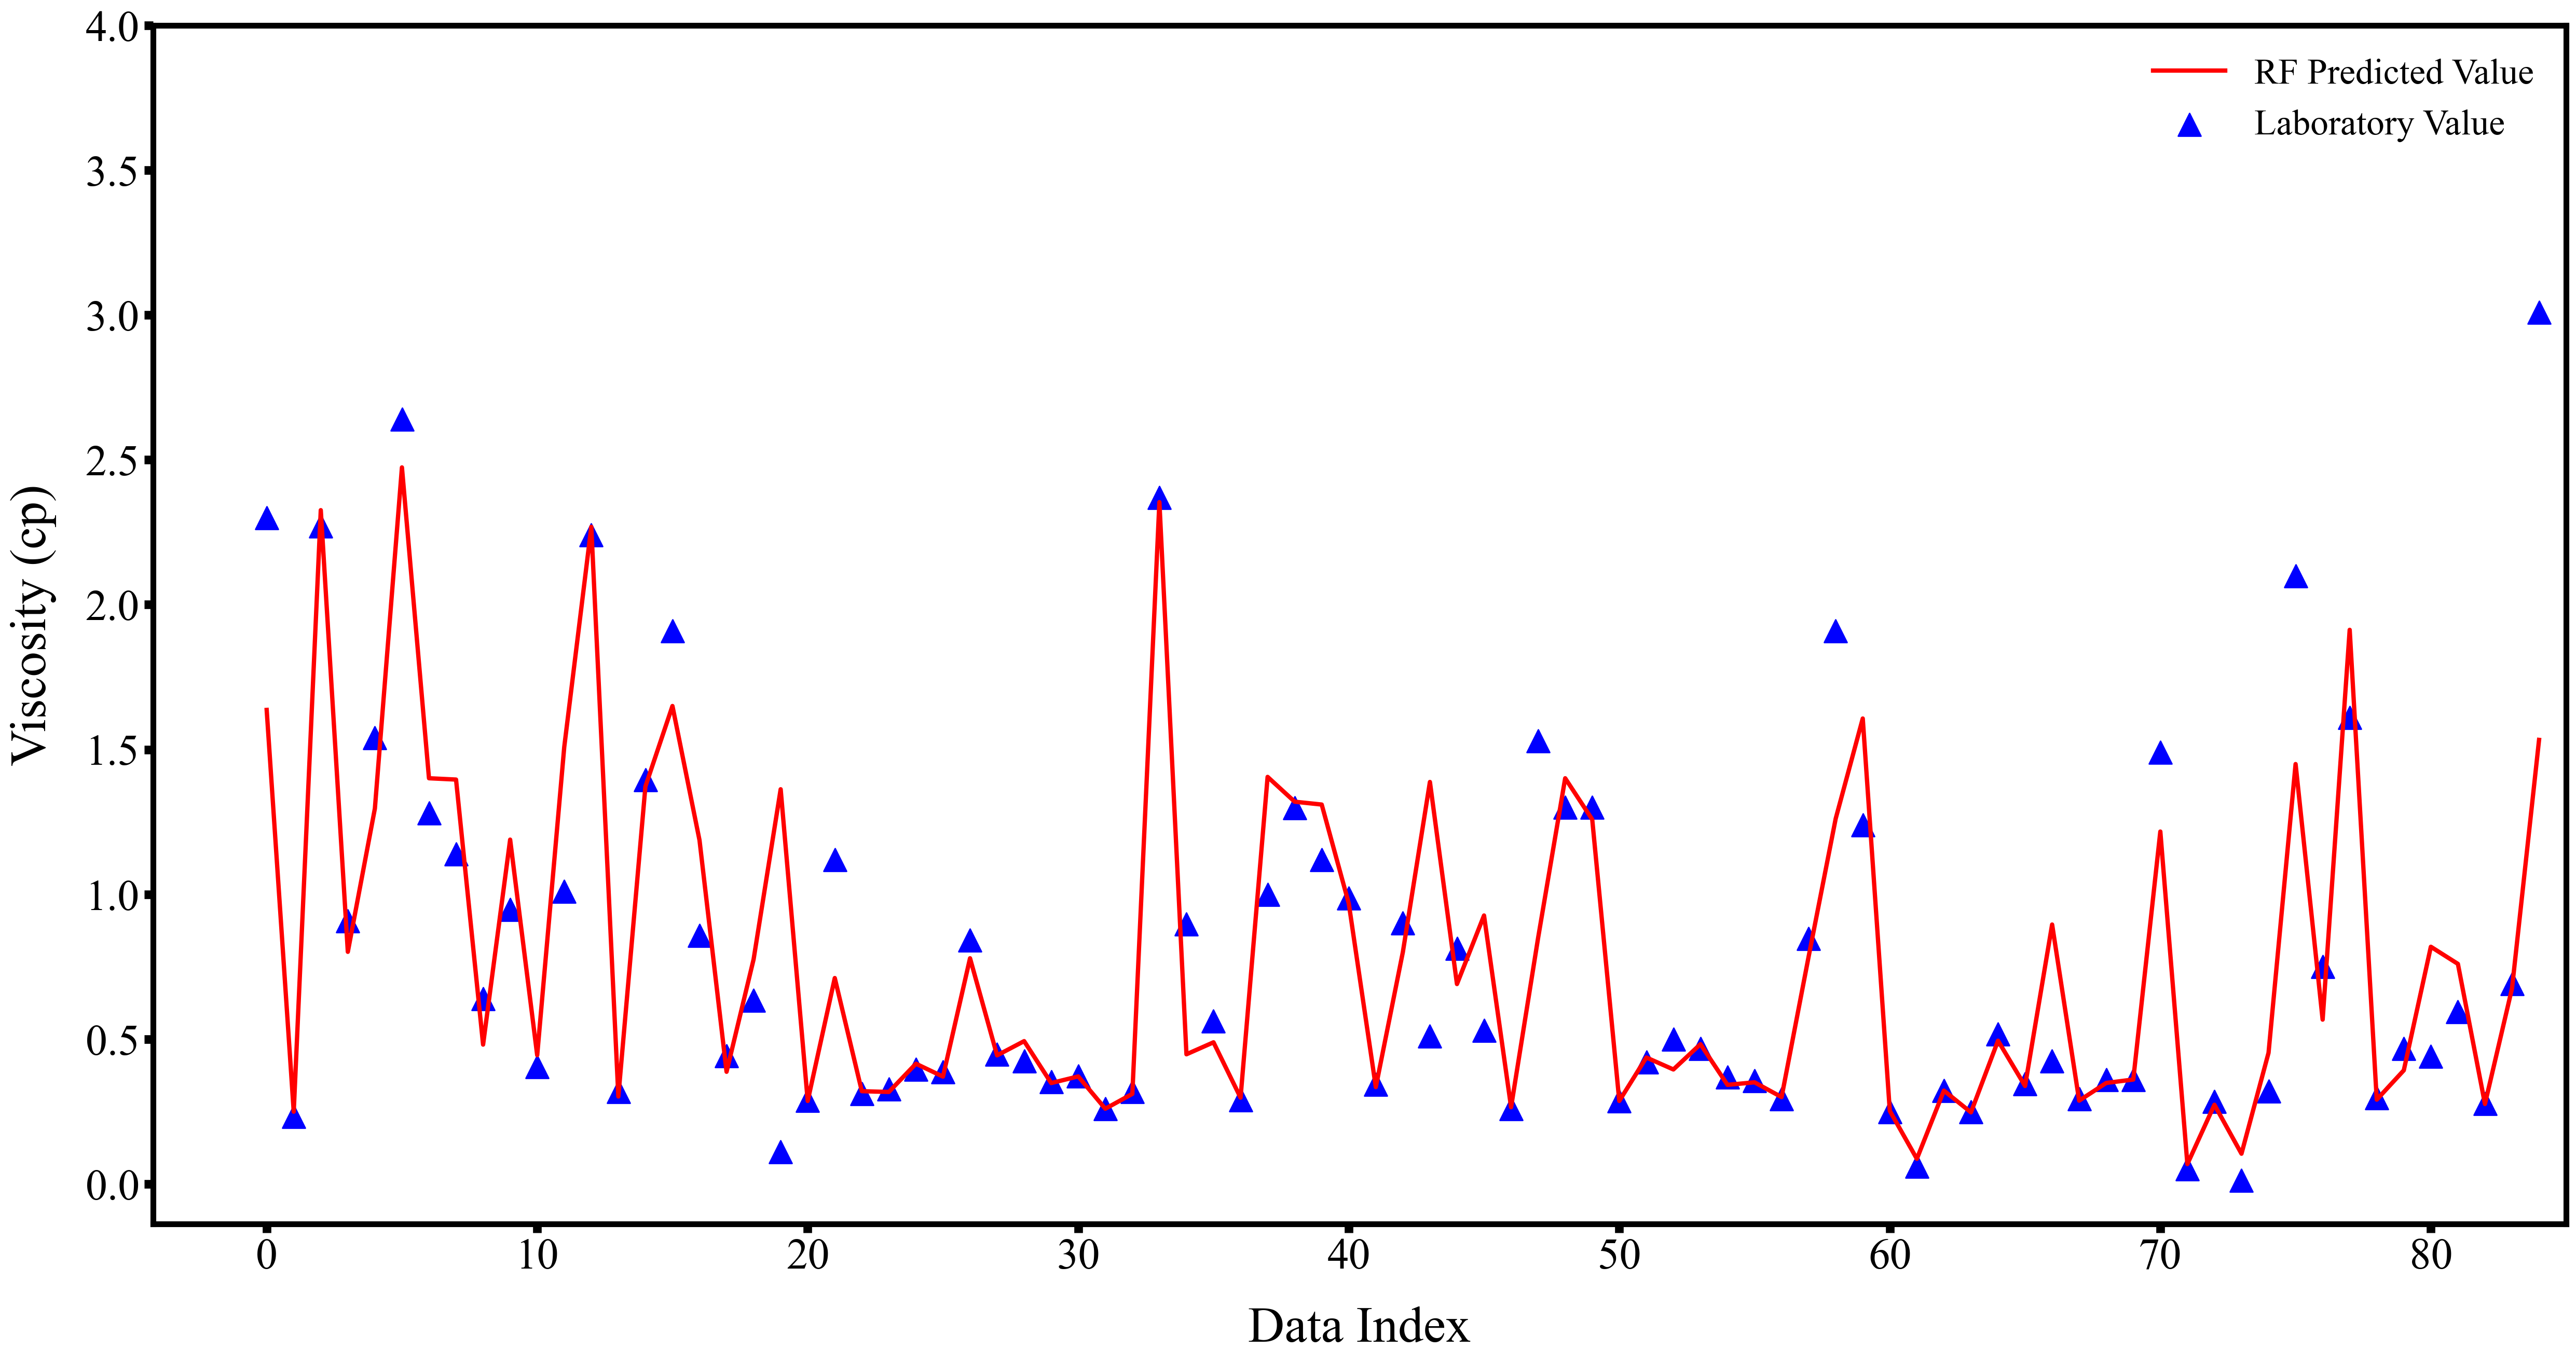

In [208]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_rf2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(rf_plot_result.index ,rf_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(rf_plot_result.index ,rf_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(rf_plot_result.index ,rf_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "RF Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)

plt.xlim(None,85)
plt.ylim(None,4)
#Defining axis of graph and increasing width of boarder of box
ax = fig_rf2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

<ipython-input-209-e0beedb6f7bd>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-209-e0beedb6f7bd>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


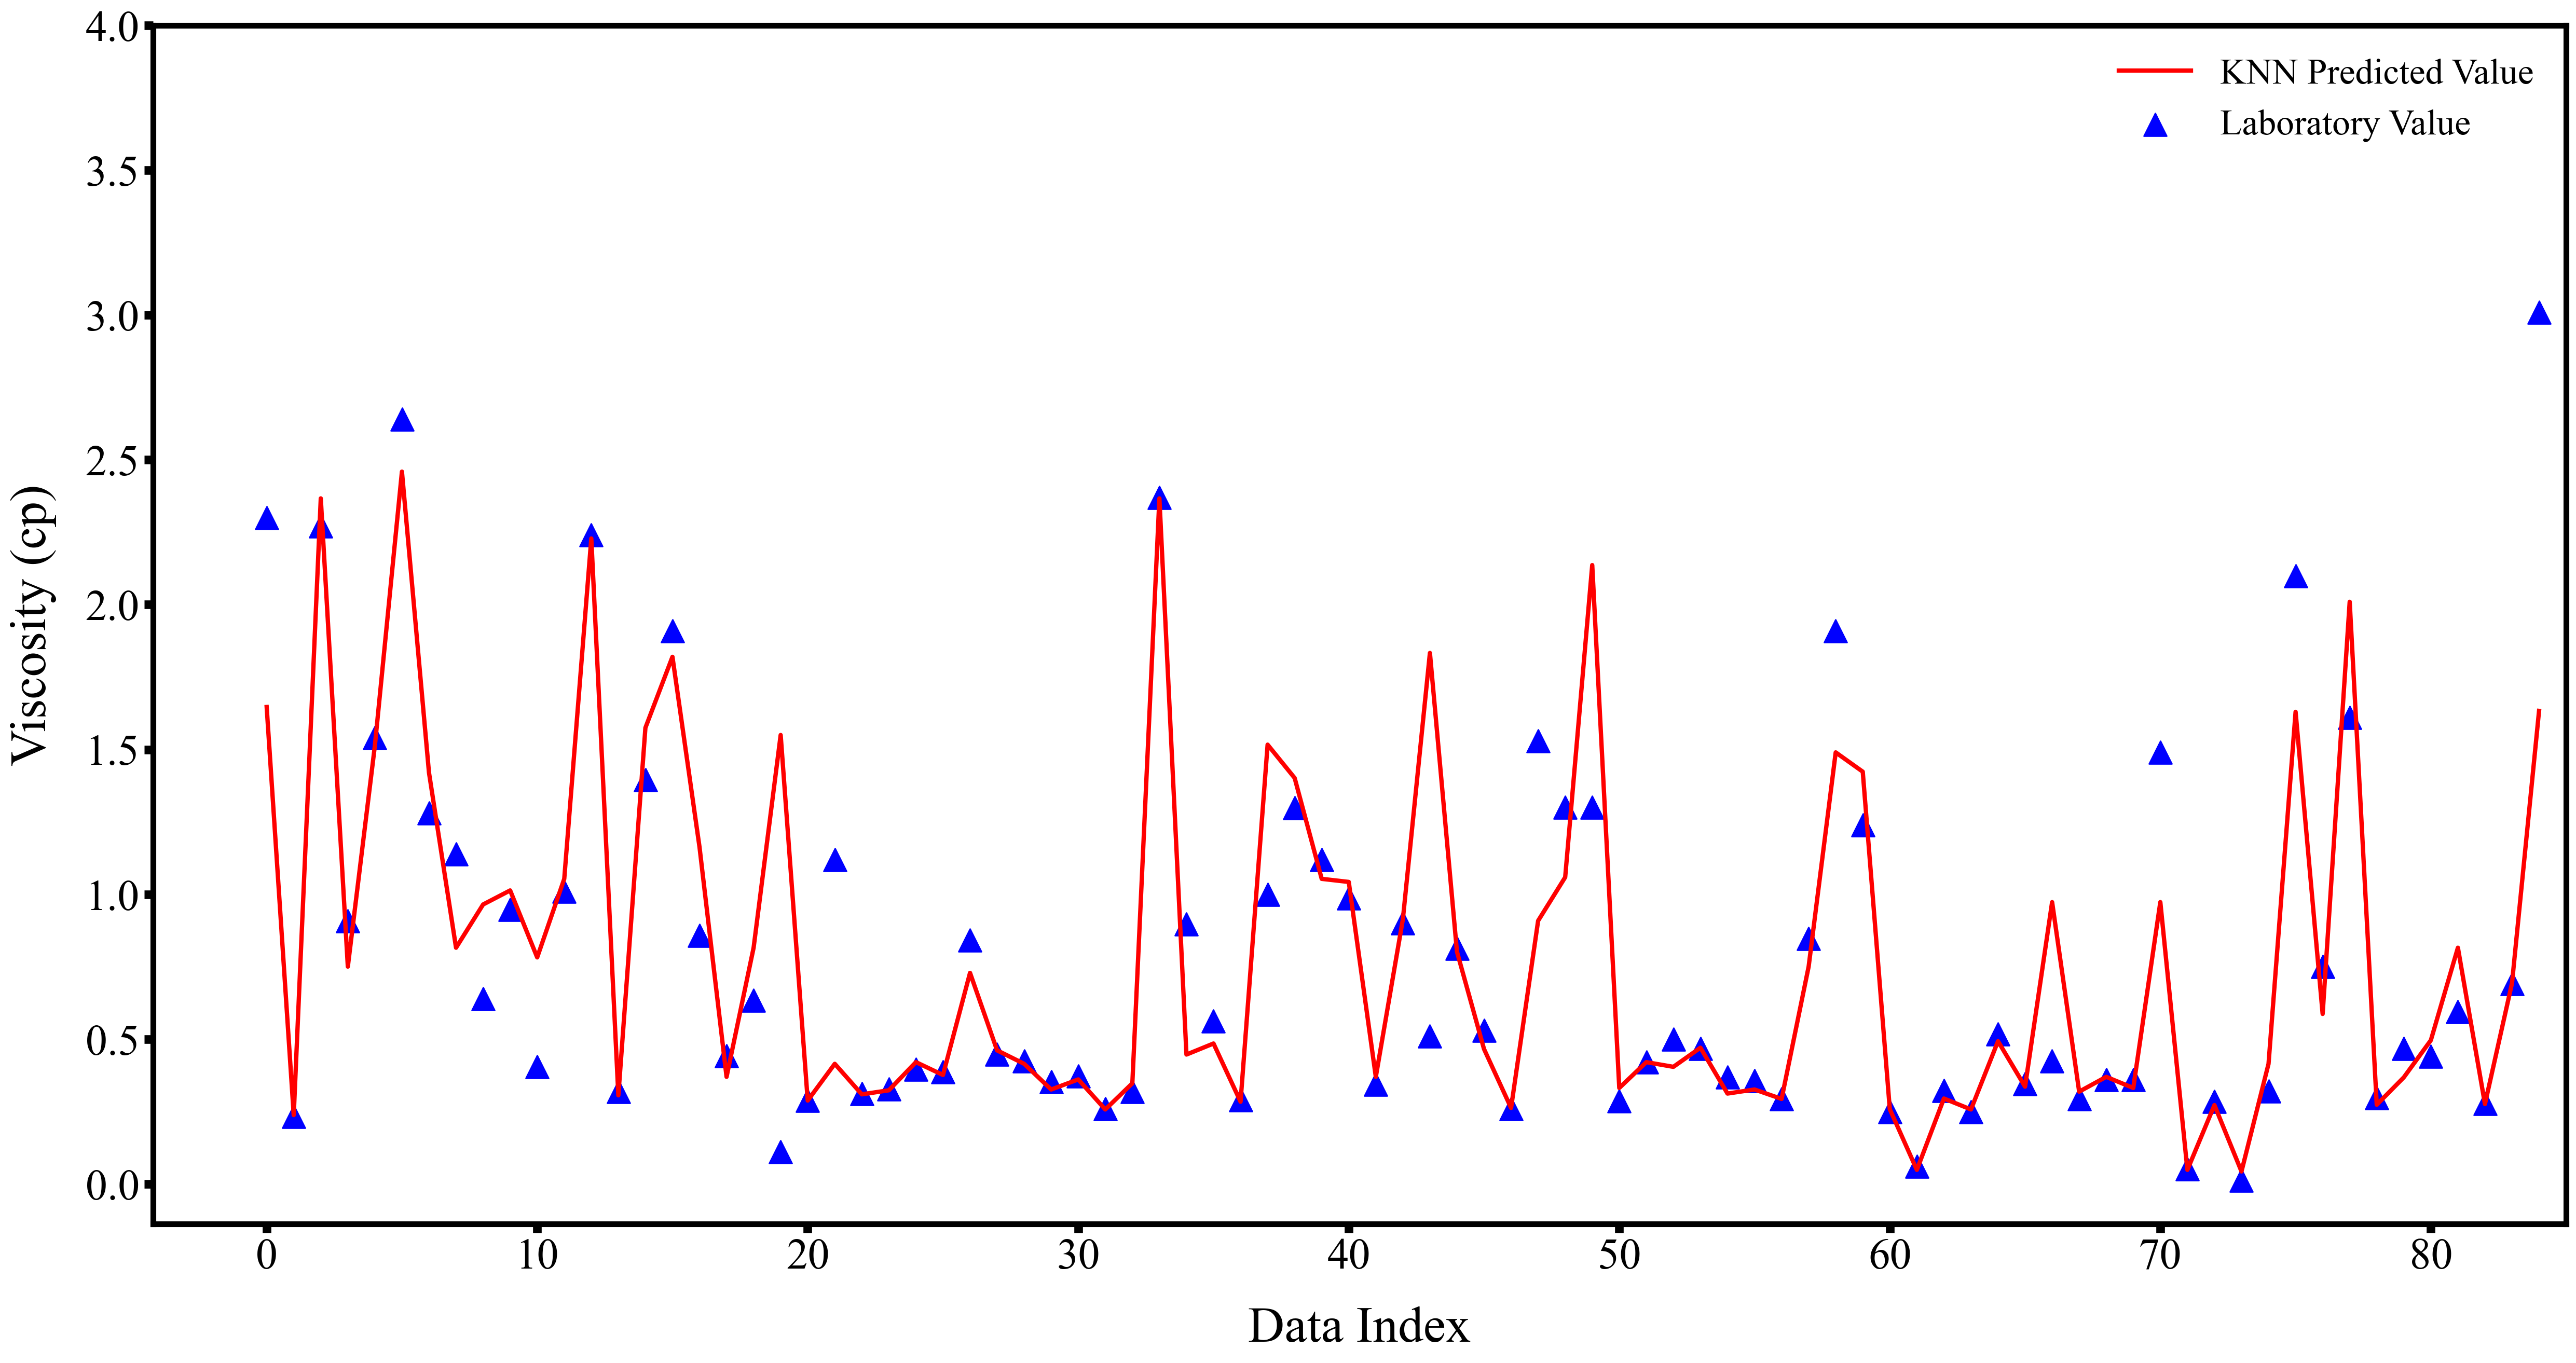

In [209]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_knn2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(knn_plot_result.index ,knn_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(knn_plot_result.index ,knn_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(knn_plot_result.index ,knn_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "KNN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)

plt.xlim(None,85)
plt.ylim(None,4)

#Defining axis of graph and increasing width of boarder of box
ax = fig_knn2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


<ipython-input-210-0d677151c850>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-210-0d677151c850>:29: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


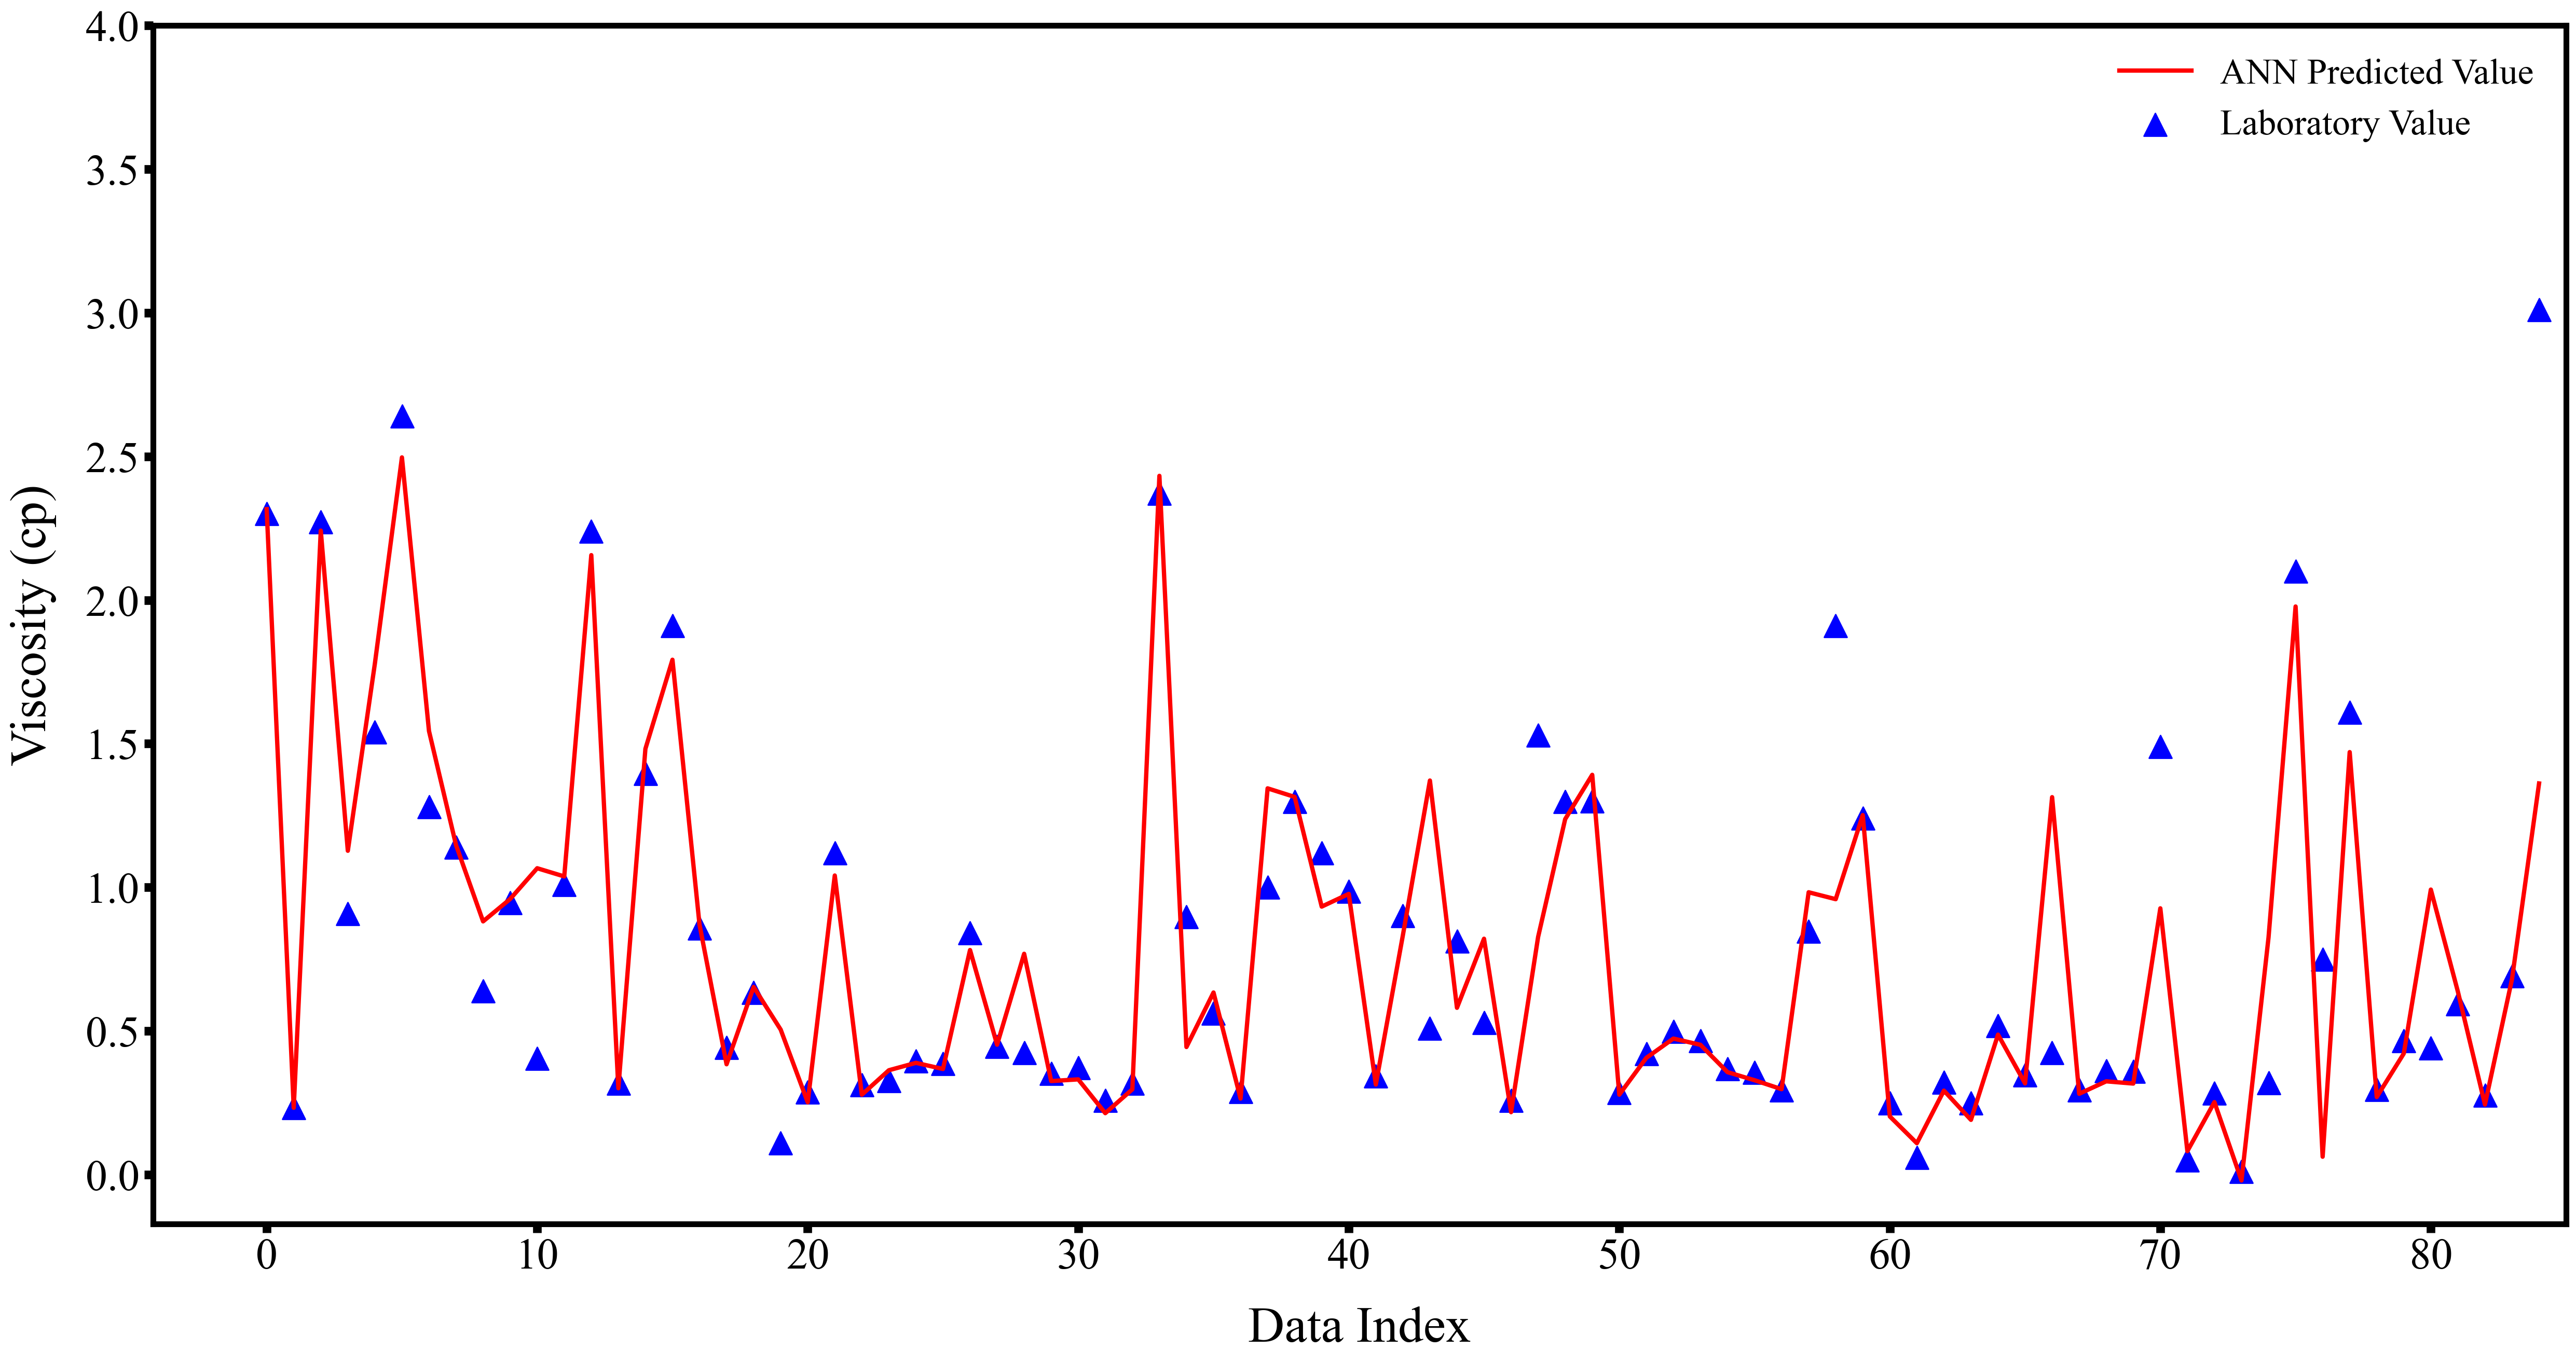

In [210]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_ann2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(ann_plot_result.index ,ann_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(ann_plot_result.index ,ann_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(ann_plot_result.index ,ann_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "ANN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)

plt.xlim(None,85)
plt.ylim(None,4)

#Defining axis of graph and increasing width of boarder of box
ax = fig_ann2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


<ipython-input-211-0a3c538a6f5c>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-211-0a3c538a6f5c>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


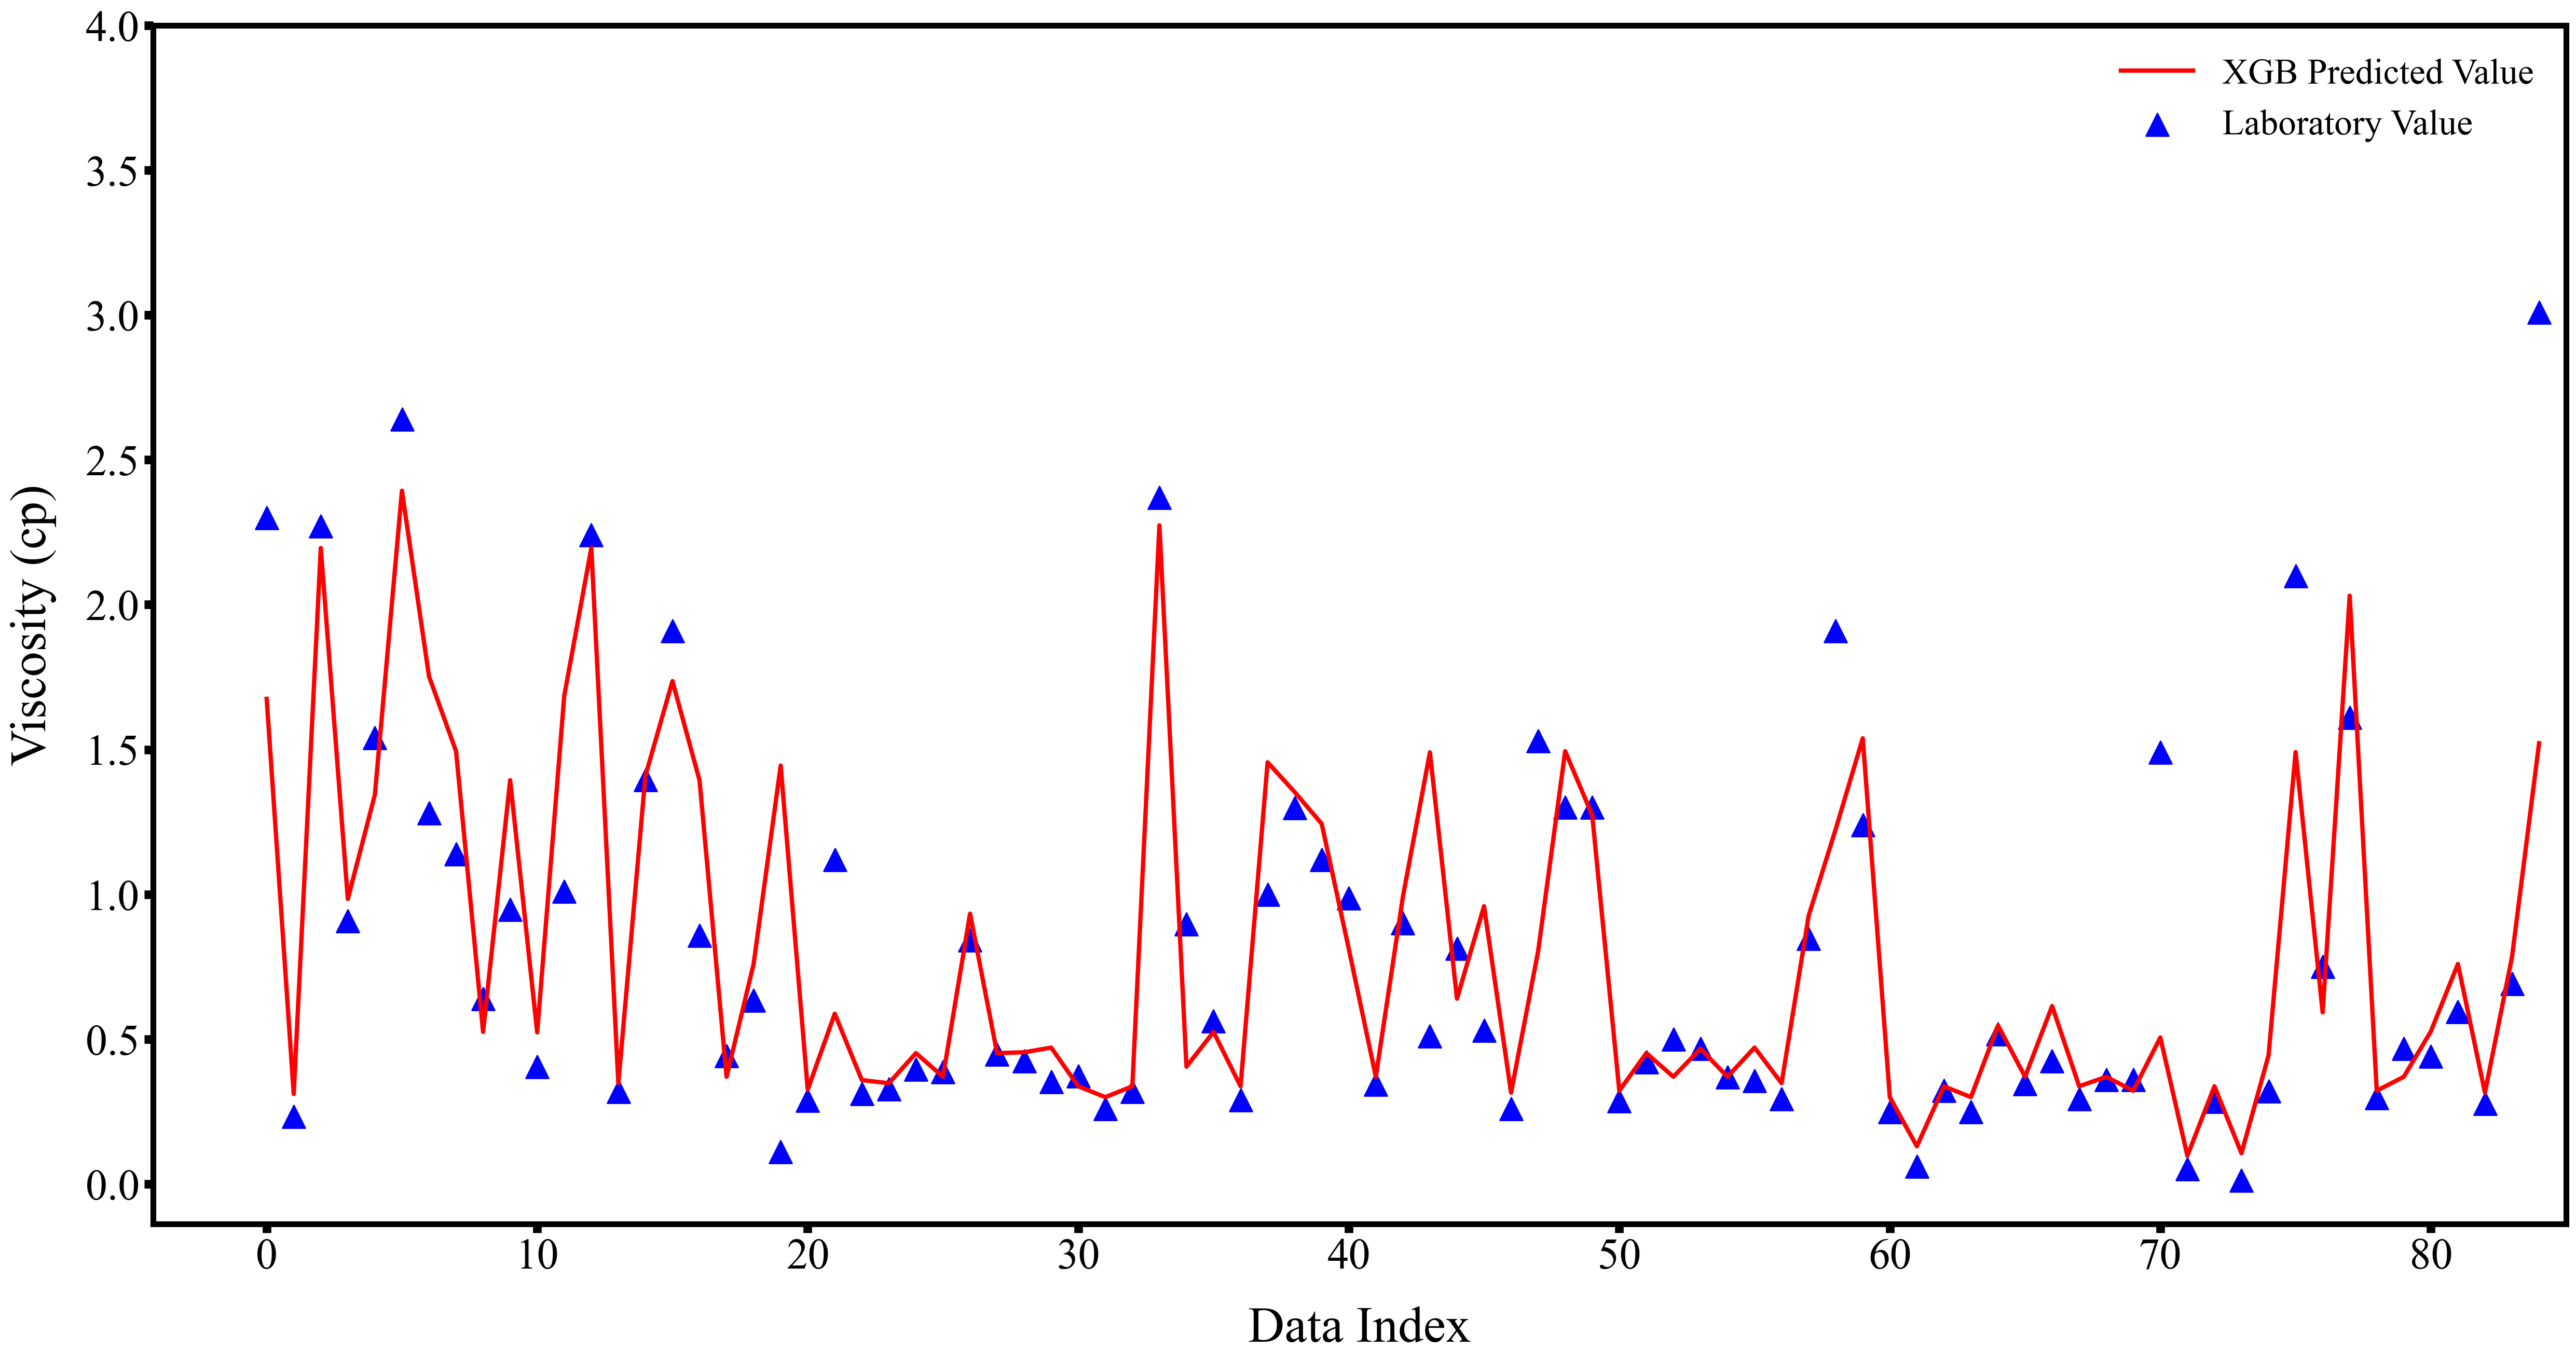

In [211]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_xgb2 = plt.figure(figsize = (30,15) , dpi = 200)
plt.scatter(xgb_plot_result.index ,xgb_plot_result[["Viscosity (test)"]] , marker = "^" , s = 250 , c = "blue",label = "Laboratory Value")
#plt.plot(xgb_plot_result.index ,xgb_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(xgb_plot_result.index ,xgb_plot_result[["Predicted Viscosity (test)"]] ,lw = 3 , c = "red",label = "XGB Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Viscosity (cp)",fontsize = 35, labelpad = 20)

plt.xlim(None,85)
plt.ylim(None,4)

#Defining axis of graph and increasing width of boarder of box
ax = fig_xgb2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

